In [ ]:
import sys
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm
import scipy as scp
import arviz as az
import pandas as pd

%config InlineBackend.figure_format = 'retina'
az.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])

/var/folders/l3/jb3srxhd47x4q3y8b7vgxm8c0000gp/T/ipykernel_11354/3491271763.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  az.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
/var/folders/l3/jb3srxhd47x4q3y8b7vgxm8c0000gp/T/ipykernel_11354/3491271763.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  az.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])


Let's revisit the globe tossing example at the top.

p = probability of water
w = number of water
n = number of trials

P(p|w,n) 
= (P(w,n|p) * P(p)) / P(w,n)
= (P(w|n,p) * P(p)) / 

pmf, or pdf, gives the probability of p given a 


In [ ]:
# generate 
random = lambda: np.random.rand() * 2 - 1

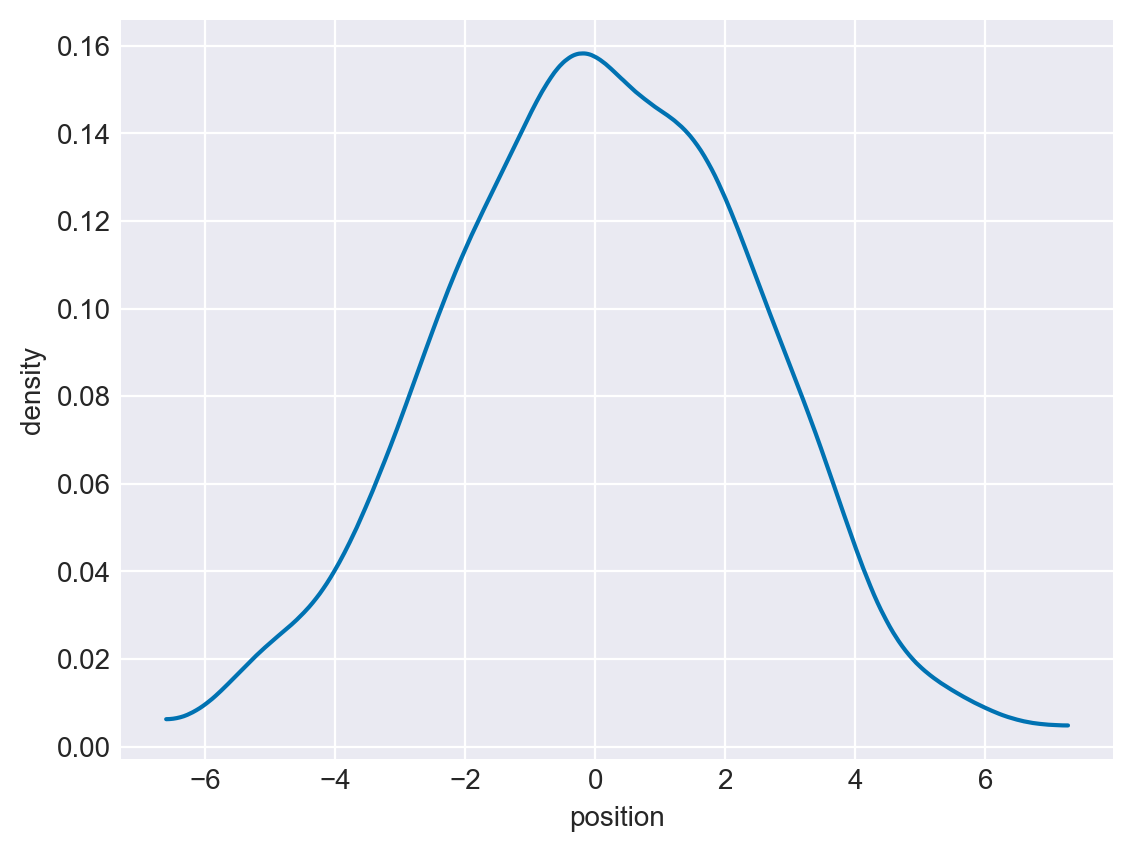

In [ ]:
def density_plot(x, smoothness=None):
    params = {}
    if smoothness:
        params['bw_fct'] = smoothness
    grid, pdf = az.stats.kde(x, **params)
    plt.plot(grid, pdf)
    plt.xlabel('position')
    plt.ylabel('density')

# randomly walk 16 steps, then repeat the experiment 1000 times
x = np.array([(np.random.rand(16) * 2 - 1).sum() for _ in range(1000)])

density_plot(x) # looks normal

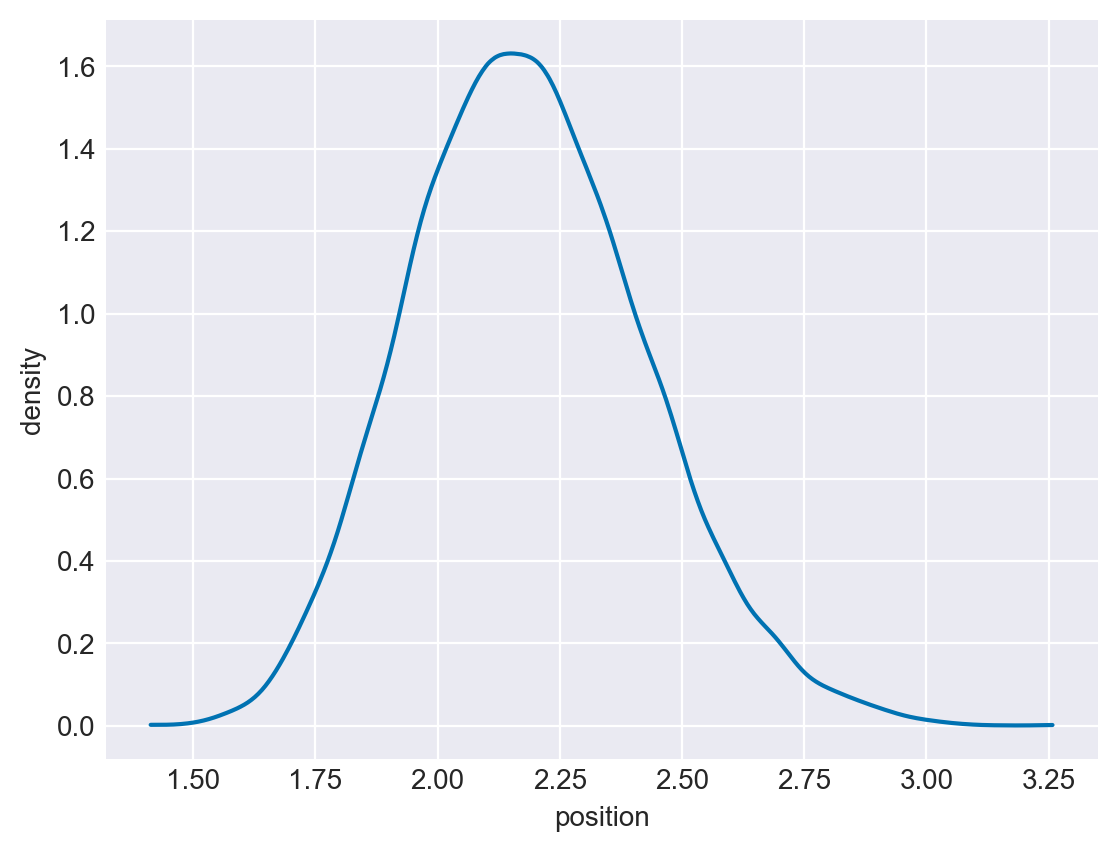

In [ ]:
# multiply 16 numbers together, then repeat the experiment 10000 times
x = np.array([(np.random.rand(16) * 0.1 + 1).prod() for _ in range(10000)])

density_plot(x) # looks normal


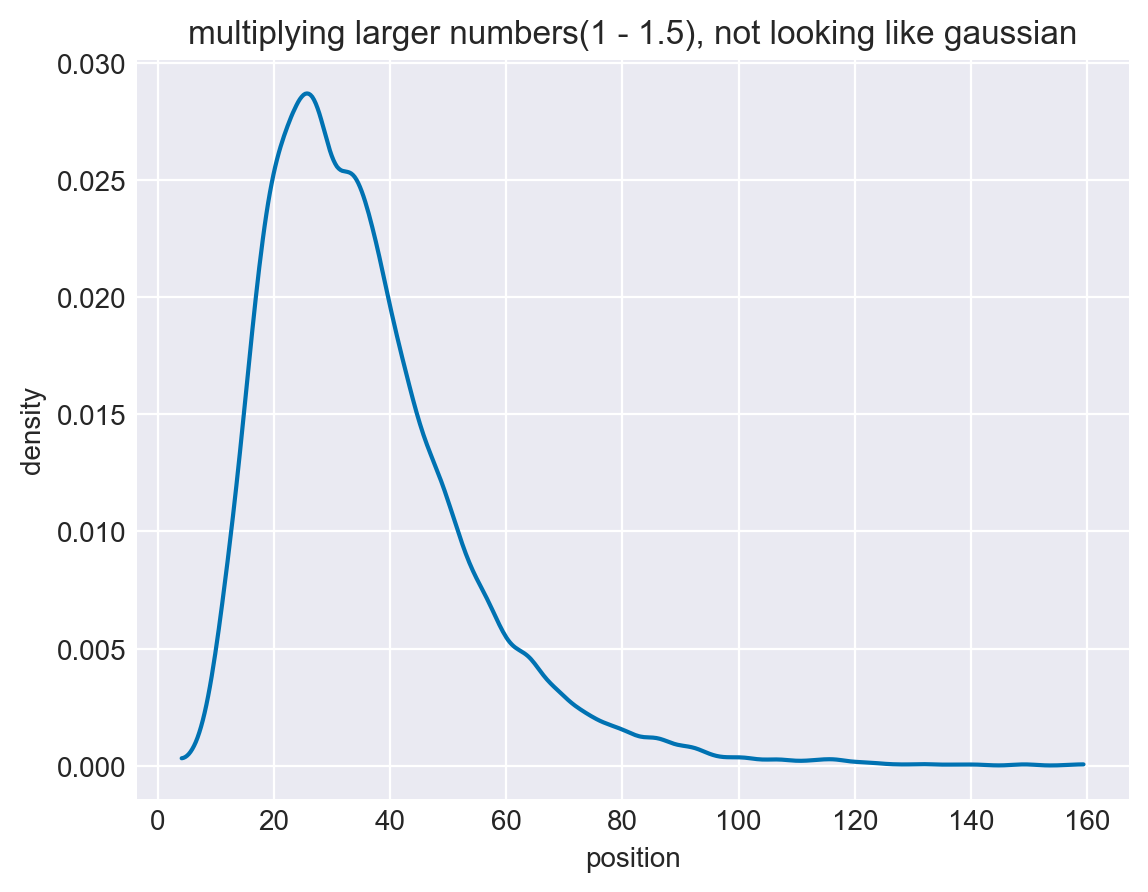

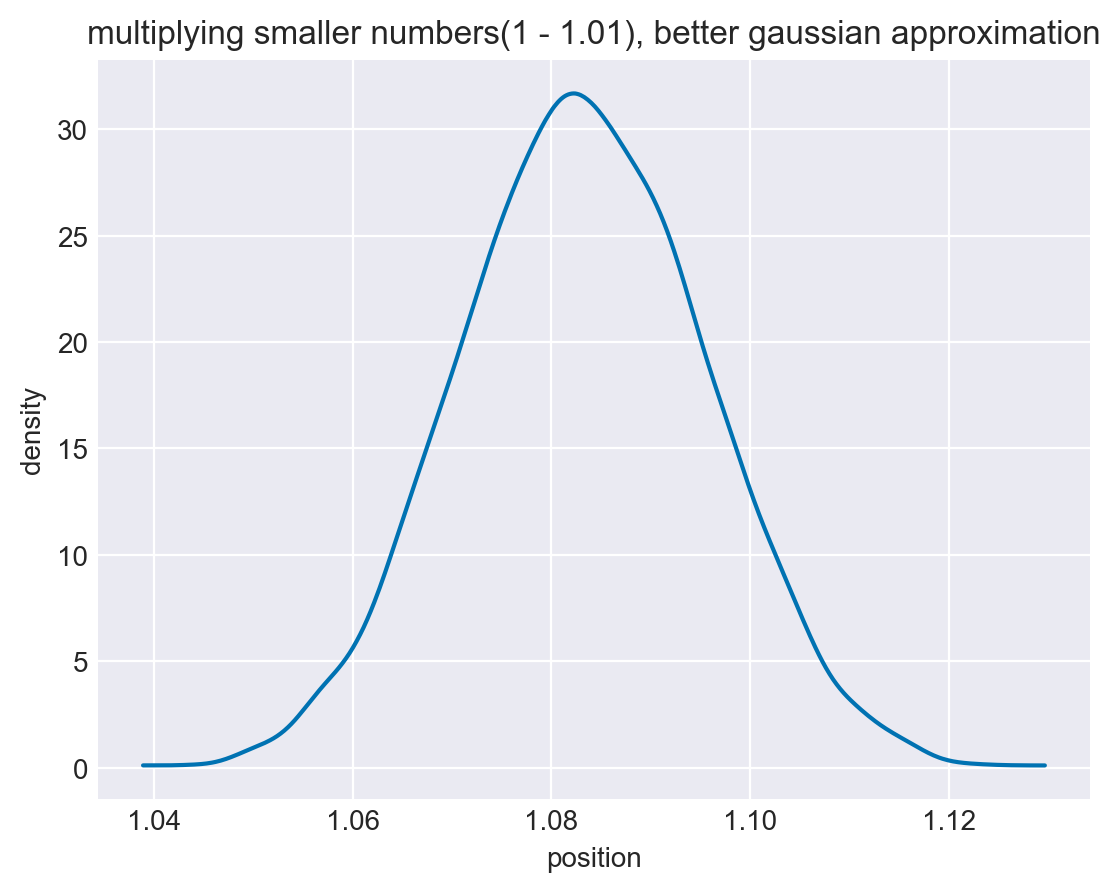

In [ ]:
# Multiplying small numbers can be approximated by addition

# 1.1 x 1.1 = 1.21

# 1.1 x 1.1 = (1 + 0.1)(1 + 0.1) = 1 + 0.2 + 0.01

x = np.array([(np.random.rand(16) * 0.5 + 1).prod() for _ in range(10000)])
plt.title('multiplying larger numbers(1 - 1.5), not looking like gaussian')
density_plot(x)
plt.show()

x = np.array([(np.random.rand(16) * 0.01 + 1).prod() for _ in range(10000)])
plt.title('multiplying smaller numbers(1 - 1.01), better gaussian approximation')
density_plot(x) # looks normal

why? because adding logs is like multiplying...


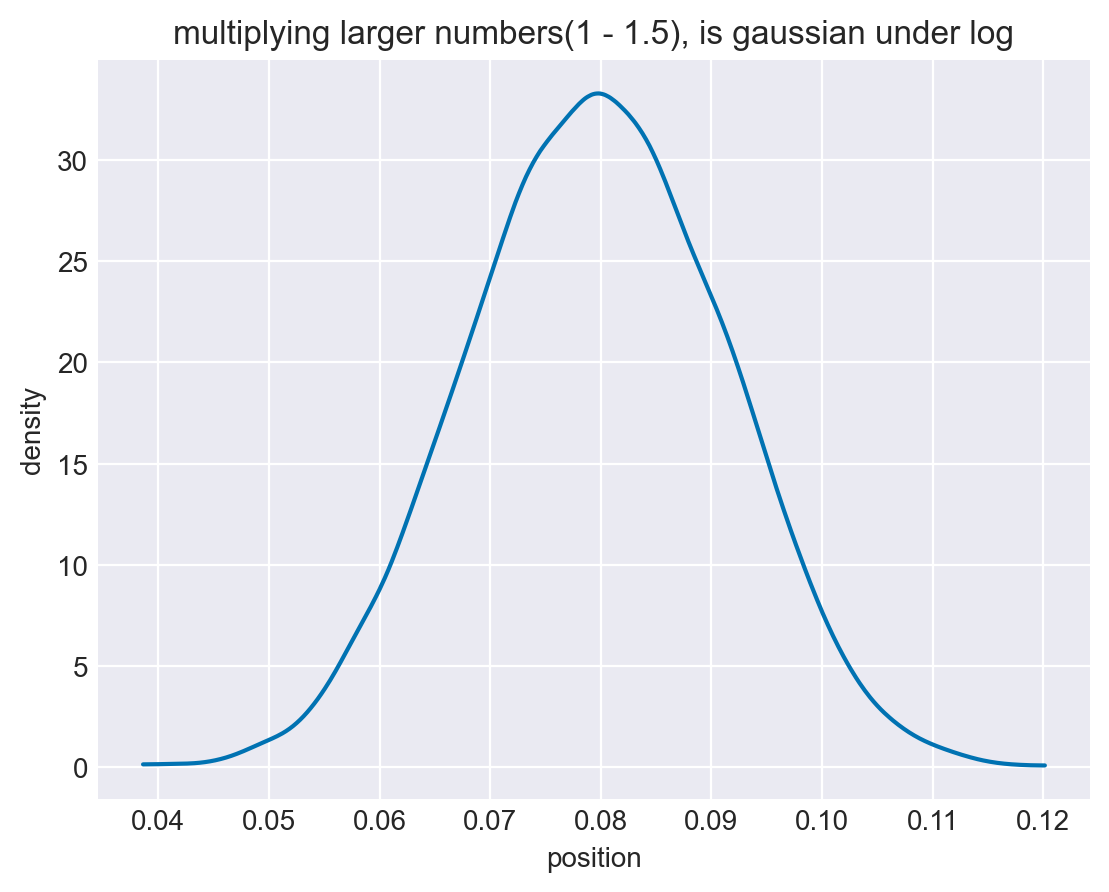

In [ ]:
x = np.array([np.log((np.random.rand(16) * 0.01 + 1).prod()) for _ in range(10000)])
plt.title('multiplying larger numbers(1 - 1.5), is gaussian under log')
density_plot(x) # looks normal
print('why? because adding logs is like multiplying...')

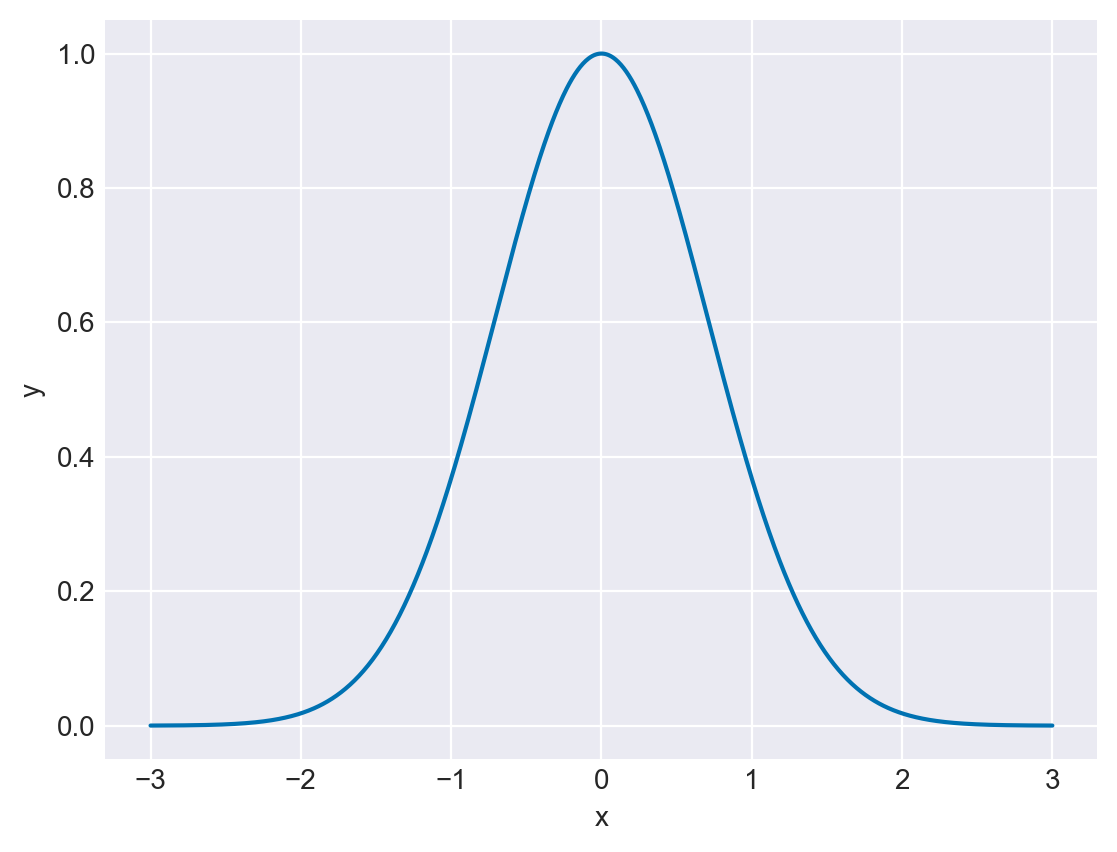

In [ ]:
# even exp(-y^2) yields a gaussian like distribution...

x = np.linspace(-3, 3, 1000)
y = np.exp(-x**2)
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

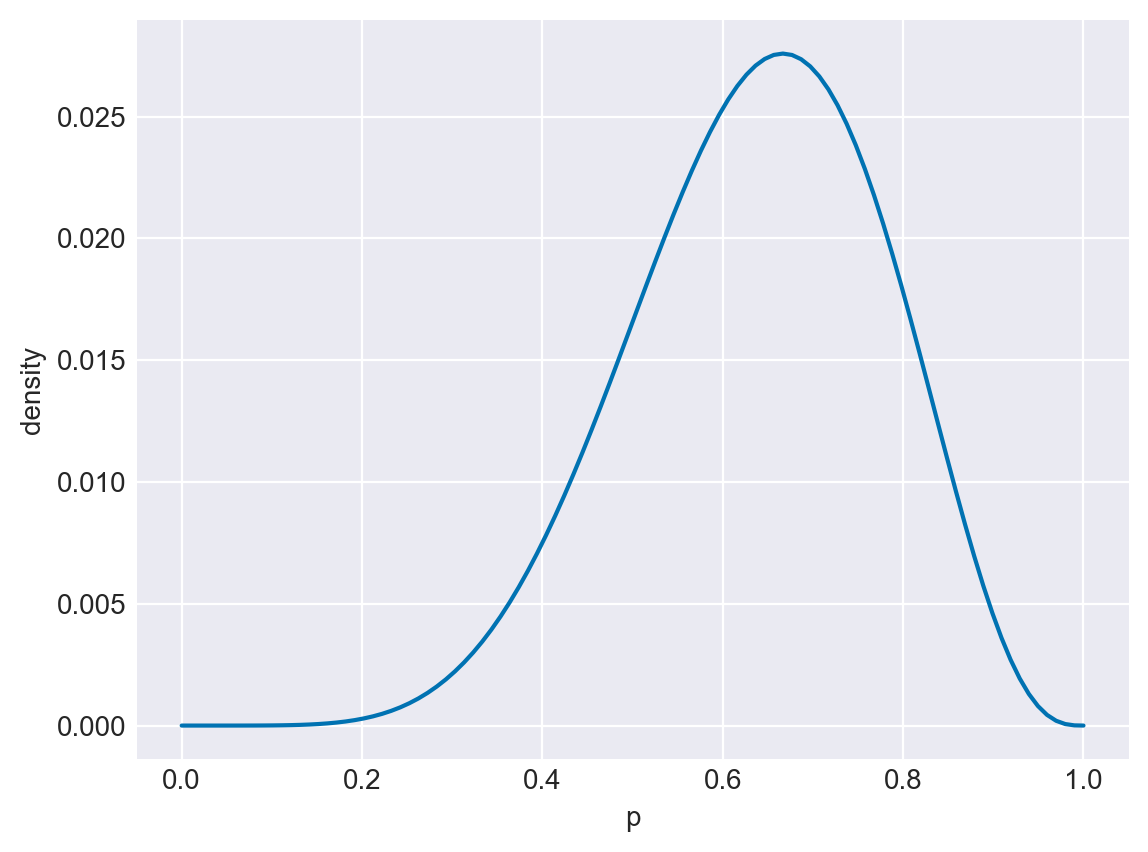

In [ ]:
# formalizing the code from earlier chapters:
from scipy.stats import binom

w, n = 6, 9
p_grid = np.linspace(0, 1, 100)
posterior = binom.pmf(k=w, n=n, p=p_grid)
posterior = posterior/posterior.sum()
plt.plot(p_grid, posterior)
plt.xlabel('p')
plt.ylabel('density')
plt.show()



In [ ]:
d = pd.read_csv('data/howell.csv', sep=';')
d.head(10)

height     weight   age  male
0  151.765  47.825606  63.0     1
1  139.700  36.485807  63.0     0
2  136.525  31.864838  65.0     0
3  156.845  53.041914  41.0     1
4  145.415  41.276872  51.0     0
5  163.830  62.992589  35.0     1
6  149.225  38.243476  32.0     0
7  168.910  55.479971  27.0     1
8  147.955  34.869885  19.0     0
9  165.100  54.487739  54.0     1

In [ ]:
d.describe()

height      weight         age        male
count  544.000000  544.000000  544.000000  544.000000
mean   138.263596   35.610618   29.344393    0.472426
std     27.602448   14.719178   20.746888    0.499699
min     53.975000    4.252425    0.000000    0.000000
25%    125.095000   22.007717   12.000000    0.000000
50%    148.590000   40.057844   27.000000    0.000000
75%    157.480000   47.209005   43.000000    1.000000
max    179.070000   62.992589   88.000000    1.000000

In [ ]:
# filter for people 18 and over.
d2 = d[d.age >= 18]
d2 = d2.reset_index(drop=True)
d2.describe()

height      weight         age        male    weight_s
count  352.000000  352.000000  352.000000  352.000000  352.000000
mean   154.597093   44.990486   41.138494    0.468750    0.637255
std      7.742332    6.456708   15.967855    0.499733    0.438660
min    136.525000   31.071052   18.000000    0.000000   -0.308412
25%    148.590000   40.256290   28.000000    0.000000    0.315620
50%    154.305000   44.792210   39.000000    0.000000    0.623784
75%    160.655000   49.292693   51.000000    1.000000    0.929541
max    179.070000   62.992589   88.000000    1.000000    1.860292

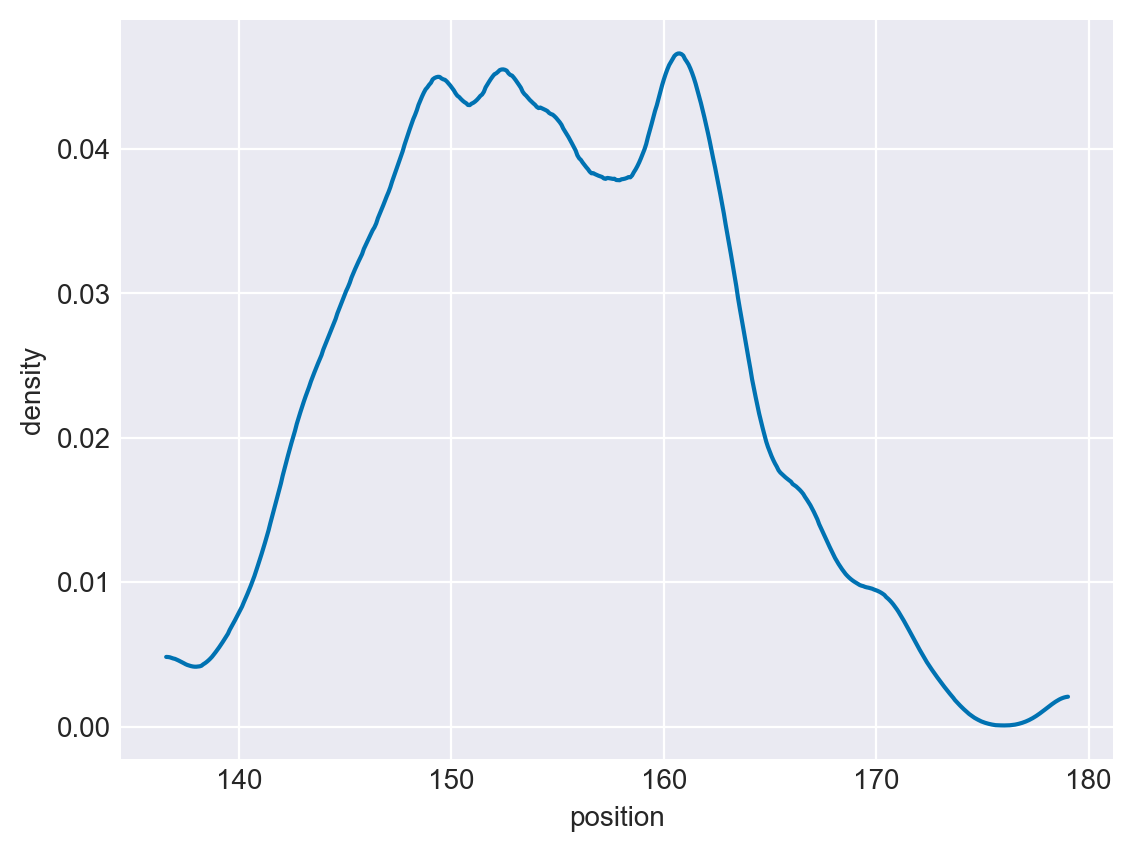

In [ ]:
density_plot(d2.height) # for some reason this does not look quite normal.

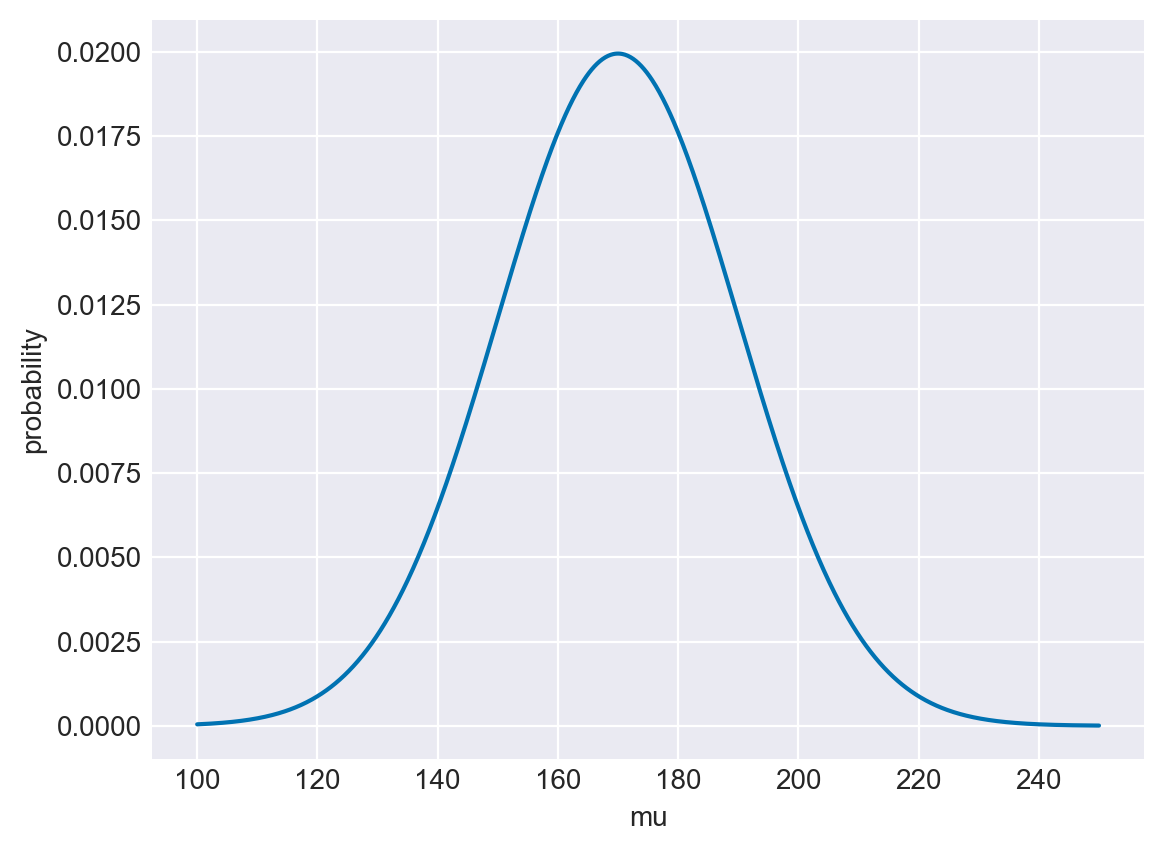

In [ ]:
# lets plot our assumption of the prior, mu. We assume that it is centered at 170
# and has a std dev of 20. This means we expect 95% of probability of mu is
# 170 +-40 (2 standard deviations)
grid = np.linspace(100, 250, 1000)
probability = scp.stats.norm.pdf(grid, 170, 20)
plt.plot(grid, probability)
plt.xlabel('mu')
plt.ylabel('probability')
plt.show()

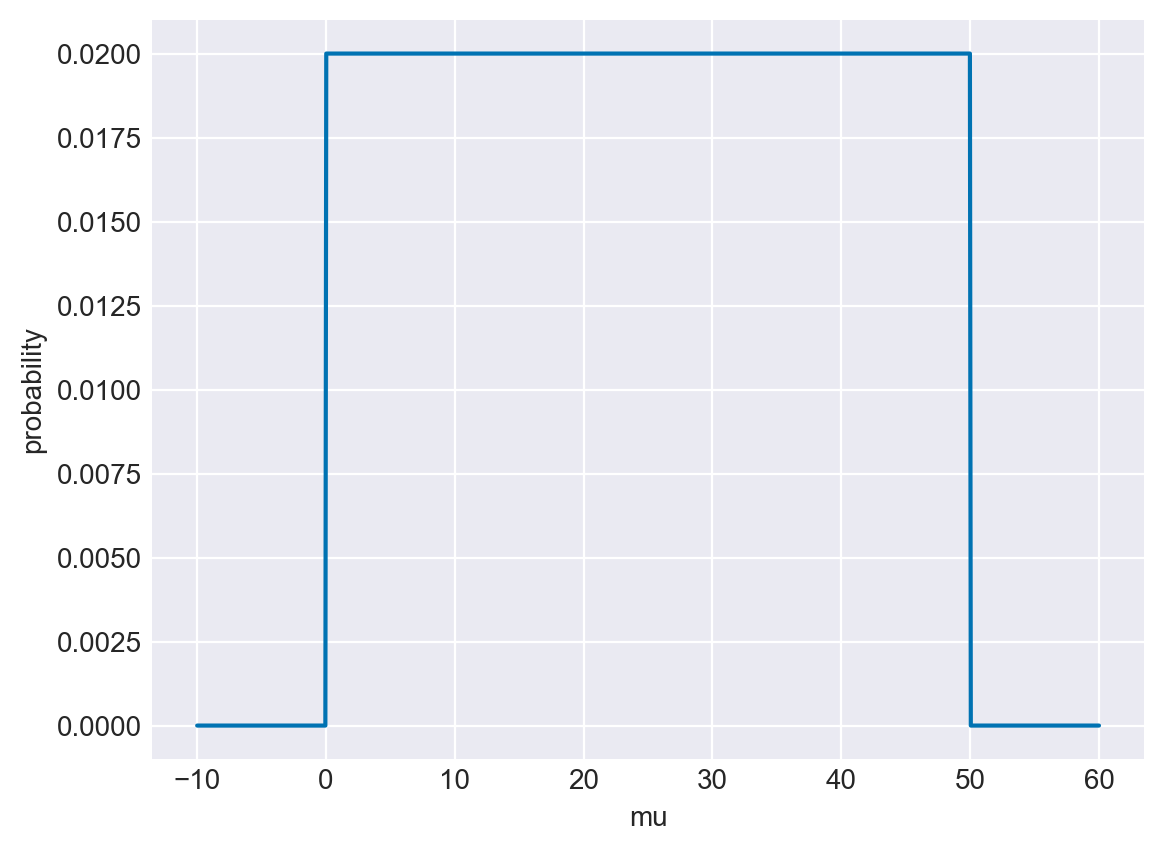

In [ ]:
# then we can plot the prior for sigma, standard deviation.
# we assume that it is a uniform probability from 0 to 50
grid = np.linspace(-10, 60, 1000)
probability = scp.stats.uniform.pdf(grid, 0, 50)
plt.plot(grid, probability)
plt.xlabel('mu')
plt.ylabel('probability')
plt.show()

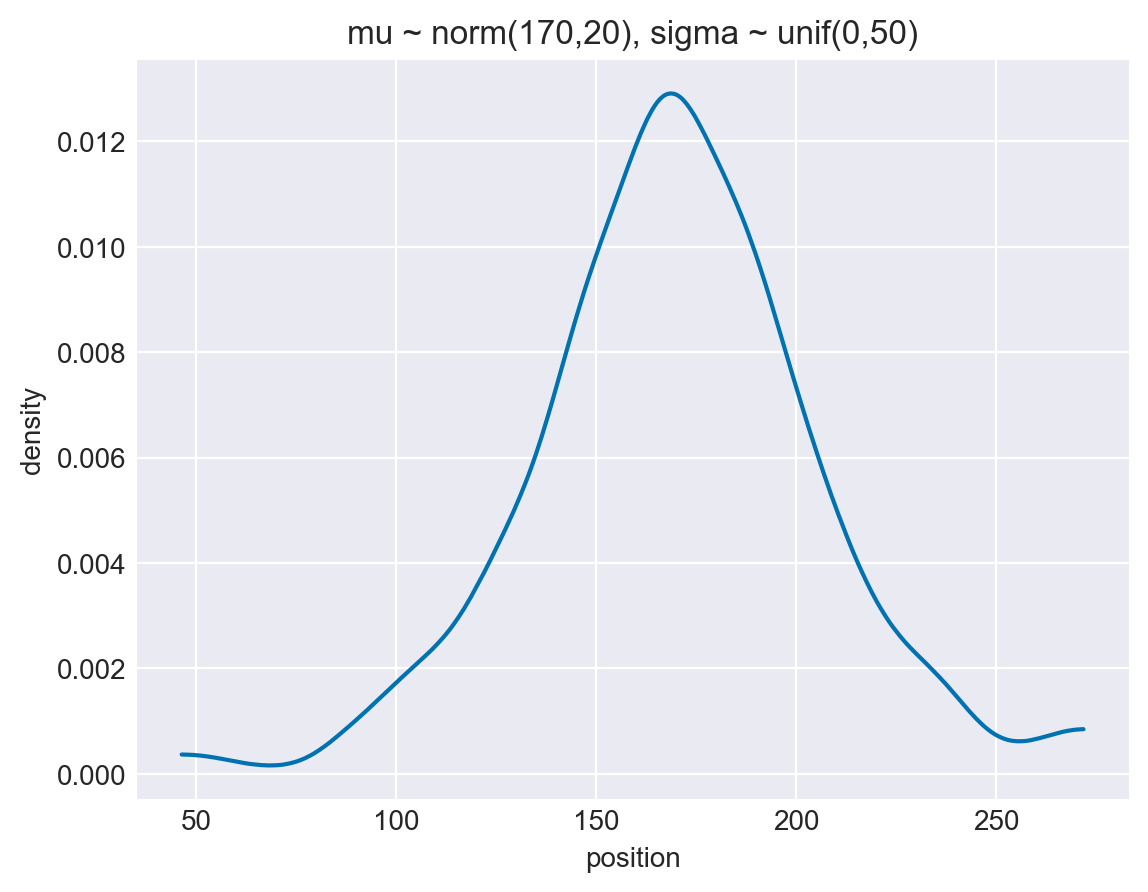

nonsensical plot, since it some of the heights are below 0


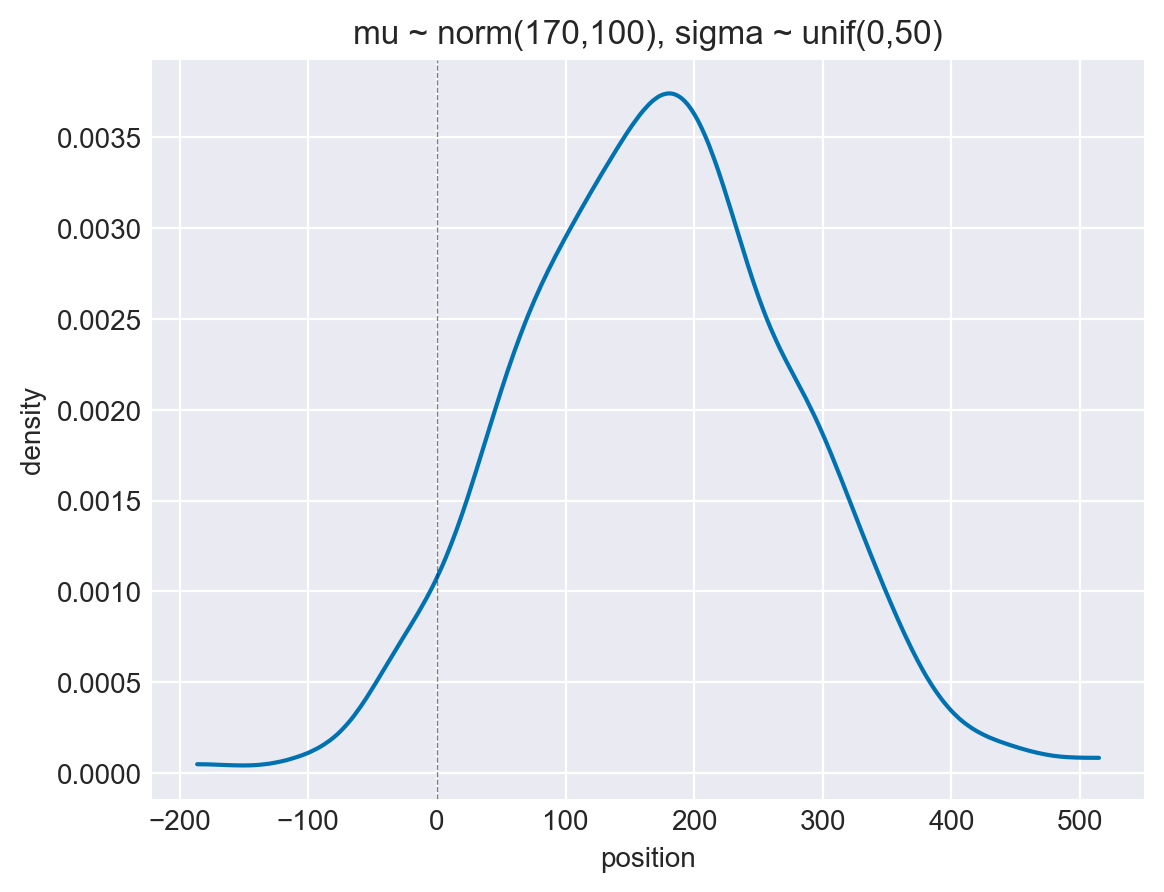

In [ ]:
# so we are modeling heights as a gaussian, and we want to do prior predictive
# simulation. Meaning given our choice of priors, what are the outcomes of our
# gaussian distribution? do the values make sense?

# To get a gaussian distribution, we generate potential values 
# from all of our priors, mu and sigma. Using those priors, we simulate outcomes.
# The goal is that the actual data 'lines up' with the simulated outcomes.
# This is called *prior predictive* simulation

# In one of the simulations, mu ~ norm(170,100), we see that some values fall below 0,
# which makes no sense, since heights cannot be below 0. This means that
# mu ~ norm(170,100) is a poor prior for this data.

mu_sim_20 = scp.stats.norm.rvs(170, 20, 1000)
mu_sim_100 = scp.stats.norm.rvs(170, 100, 1000)
sigma_sim = scp.stats.uniform.rvs(0, 50, 1000)


plt.title('mu ~ norm(170,20), sigma ~ unif(0,50)')
samples = scp.stats.norm.rvs(mu_sim_20, sigma_sim)
density_plot(samples)
plt.show()

print('nonsensical plot, since it some of the heights are below 0')
plt.title('mu ~ norm(170,100), sigma ~ unif(0,50)')
samples = scp.stats.norm.rvs(mu_sim_100, sigma_sim)
density_plot(samples)
plt.axvline(0, linestyle='--', linewidth=0.5, color='black', alpha=0.5)
plt.show()




In [ ]:
from itertools import product
def expand_grid(data_dict):
    """Create a dataframe from every combination of given values."""
    rows = product(*data_dict.values())
    return pd.DataFrame.from_records(rows, columns=data_dict.keys())

print(expand_grid({'foo': [1,2], 'bar': ['4', '5', '6']}))


# mgrid method, which is faster, but perhaps harder to understand.

print('original mgrid')
print(np.mgrid[1:3:1, 4:7:1])
print('reshaped into 2 rows')
print(np.mgrid[1:3:1, 4:7:1].reshape(2,-1))
print('transposed')
print(np.mgrid[1:3:1, 4:7:1].reshape(2,-1).T)

   foo bar
0    1   4
1    1   5
2    1   6
3    2   4
4    2   5
5    2   6
original mgrid
[[[1 1 1]
  [2 2 2]]

 [[4 5 6]
  [4 5 6]]]
reshaped into 2 rows
[[1 1 1 2 2 2]
 [4 5 6 4 5 6]]
transposed
[[1 4]
 [1 5]
 [1 6]
 [2 4]
 [2 5]
 [2 6]]


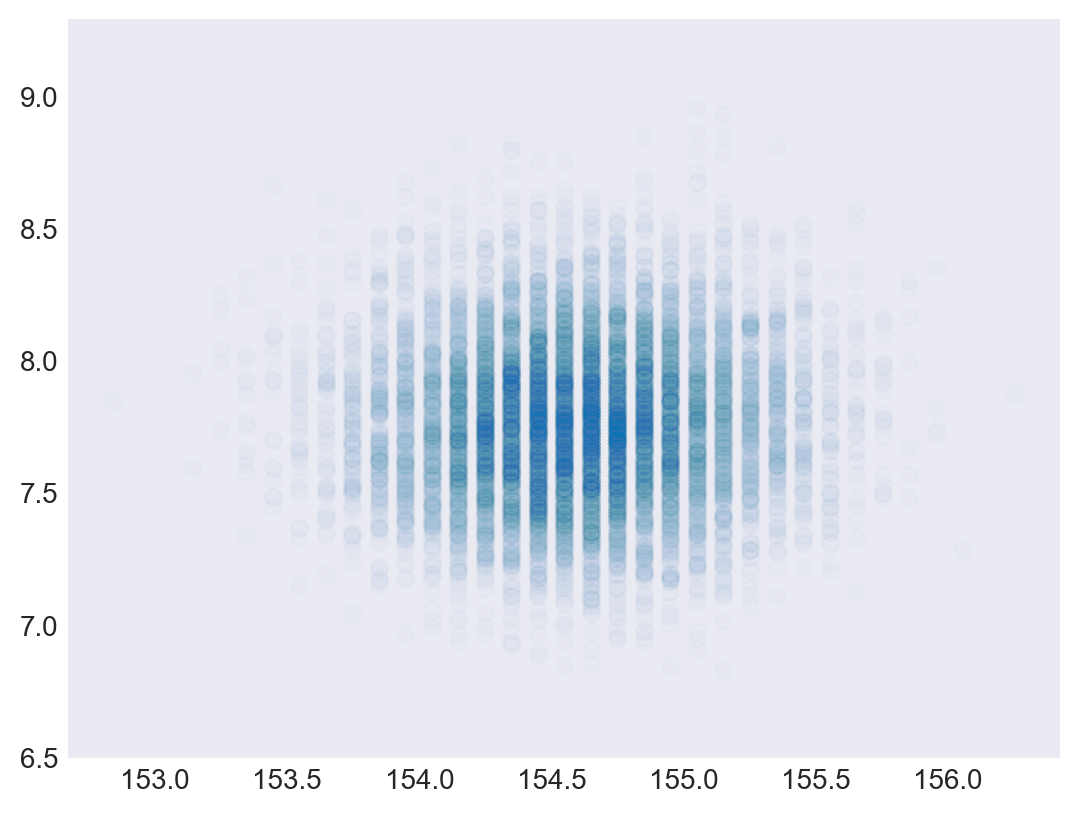

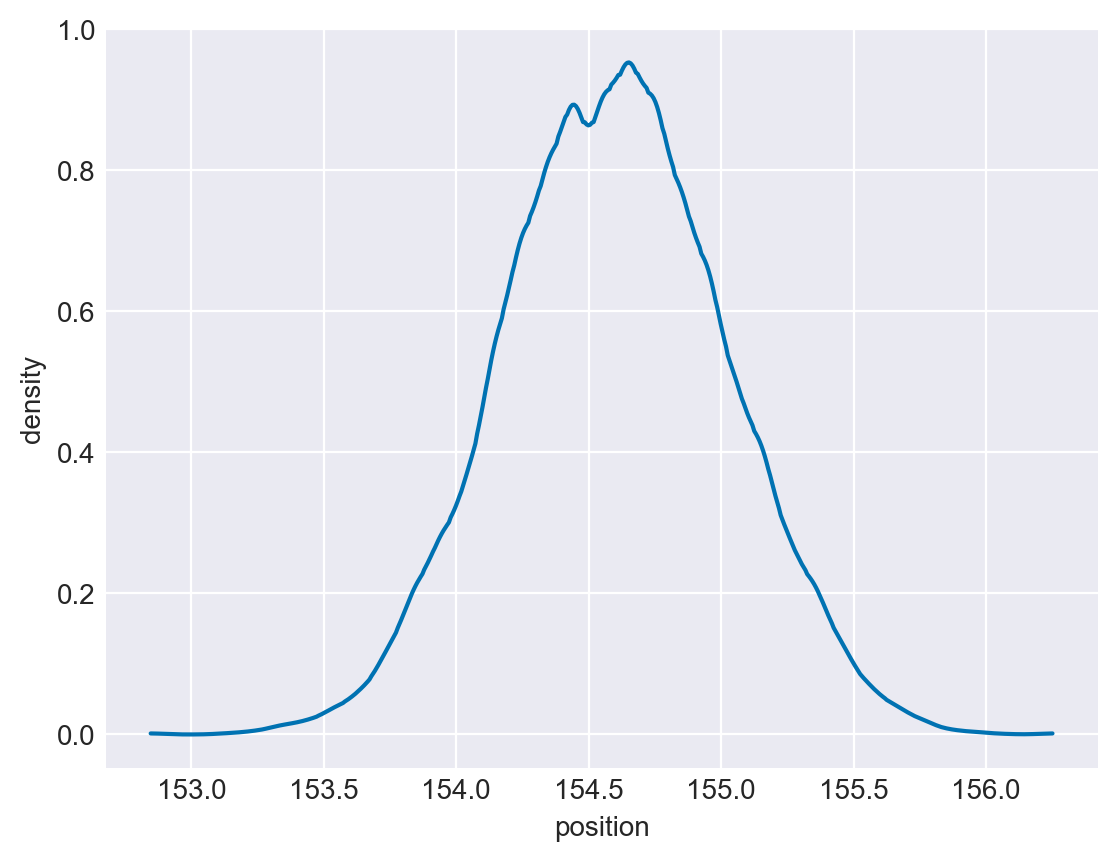

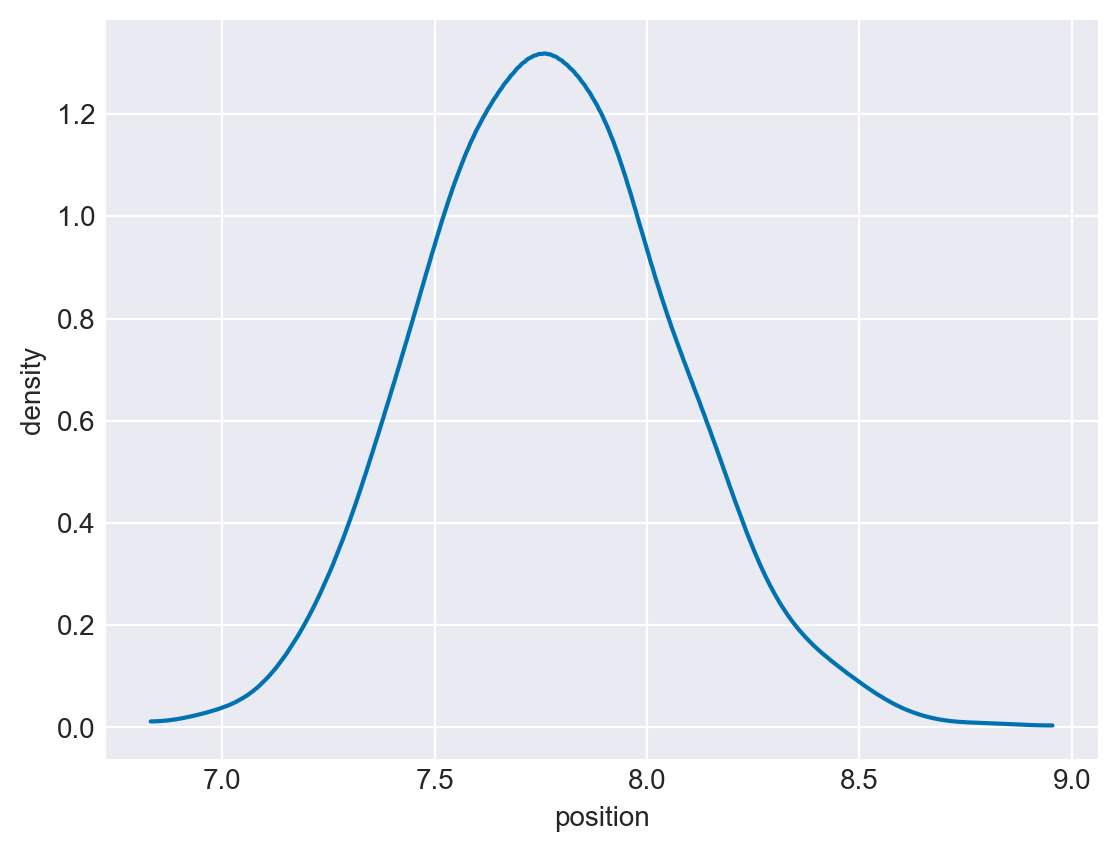

In [ ]:
# now lets do grid estimation for the posterior of the gaussian distribution
# describing the heights of adults. Note, here, we are trying to determine
# the probability of the priors based on the data.
def estimate_gaussian(mu_vals, sigma_vals, data):
    # Log likelihood of posterior.
    # This step outputs every combination of mu and sigma.
    priors = expand_grid({'mu': mu_vals, 'sigma': sigma_vals})

    # We get the joint likelihood. For each mu-sigma combination,
    # Get the log pdf for each height i, then sum them(this really means
    # multiplying the probabilities together, but we sum because its in log space)
    sum_logpdf = lambda row: sum(scp.stats.norm.logpdf(data, row.mu, row.sigma))

    # applies this function for every row in the grid of mu sigma values
    posterior_ll = priors.apply(sum_logpdf, axis=1)

    # We also multiply this by the priors mu and sigma
    + scp.stats.norm.logpdf(priors.mu, 170, 20) + scp.stats.uniform.logpdf(priors.sigma, 4, 80)

    # Instead of doing exp, we scale first by the max value(to avoid 0s when exponentiating small numbers)
    posterior_prob = np.exp(posterior_ll - max(posterior_ll))
    
    # Skip plotting posterior probabilities directly, because there isn't a proper way
    # to do a contour plot.

    # Instead, inspect by sampling from the posterior.
    # To sample from the n-d posterior, we first generate an array of indexes,
    # based on posterior probabilities, with resampling.
    samples = np.random.choice(len(posterior_prob), size=10000, p=posterior_prob/posterior_prob.sum(), replace=True)

    # Then we index the priors with this array
    mu_test = priors.mu[samples].reset_index(drop=True)
    sigma_test = priors.sigma[samples].reset_index(drop=True)

    # Now we can easily do a scatterplot.
    plt.scatter(mu_test, sigma_test, alpha=0.01)
    plt.axis('equal')
    plt.grid(False)
    plt.title
    plt.show()
    density_plot(mu_test, smoothness=2)
    plt.show()
    density_plot(sigma_test, smoothness=3)
    plt.show()

mu_vals = np.linspace(140, 170, 300)
sigma_vals = np.linspace(6, 10, 300)
estimate_gaussian(mu_vals, sigma_vals, d2.height)

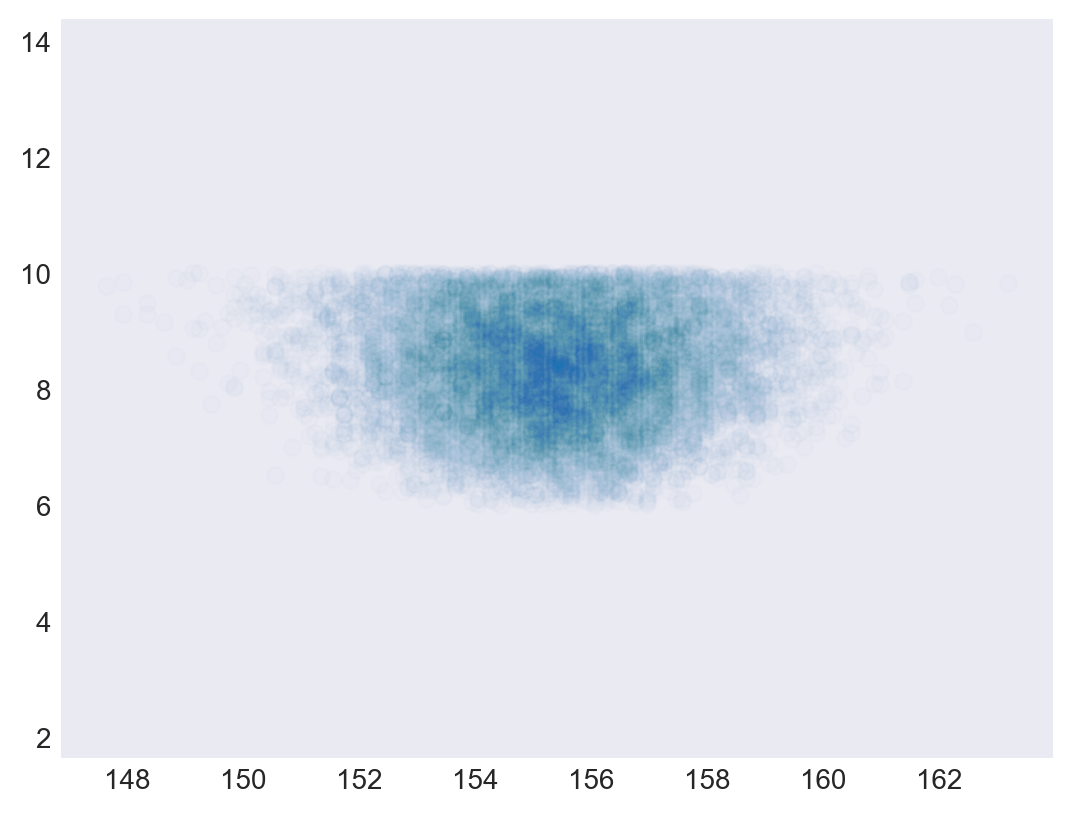

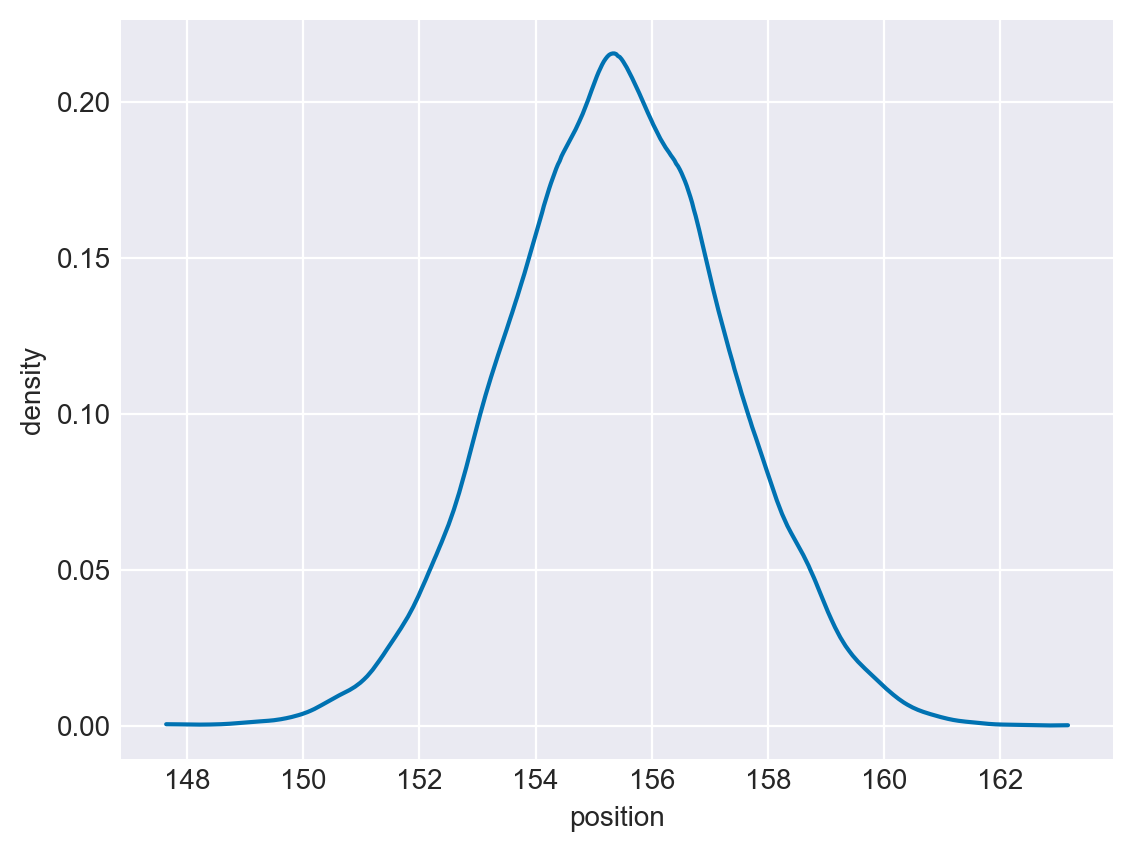

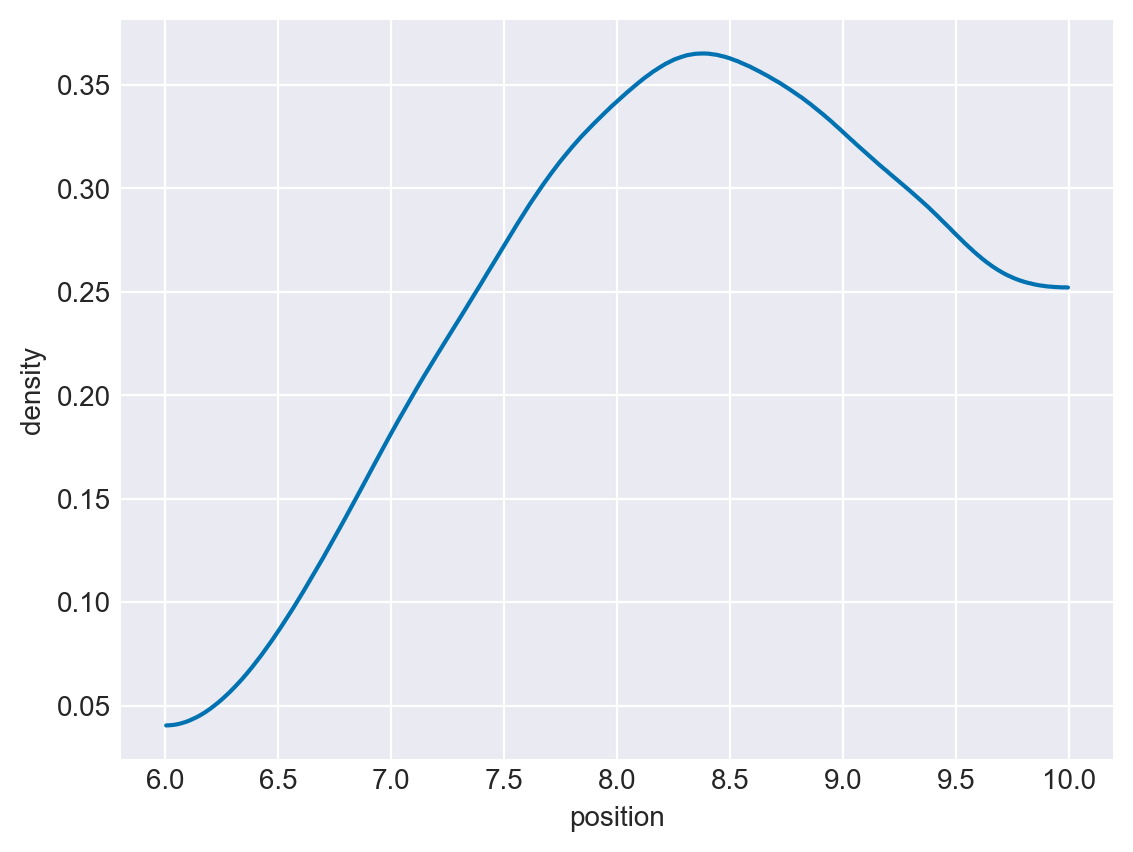

In [ ]:
# now lets try with a fraction of the data
estimate_gaussian(mu_vals, sigma_vals, d2.height.sample(20))

# There is a long tail in the sigma val, because variances must be positive. when there is not enough data,
# there is more uncertainty about how big the sigma must be, rather than how small. for example, it cannot
# be below 0.


In [ ]:

with pm.Model() as normal_aproximation:
    sigma = pm.Uniform('sigma', 0, 50)
    mu = pm.Normal('mu', 178, 20)
    prob = pm.Normal('prob', mu=mu, sigma=sigma, observed=d2.height)
    trace_4_1 = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, mu]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 13 seconds.


In [ ]:
pm.summary(trace_4_1)

mean     sd   hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
mu     154.616  0.410  153.828  155.386      0.007    0.005    3737.0   
sigma    7.770  0.295    7.198    8.298      0.005    0.003    3977.0   

       ess_tail  r_hat  
mu       2880.0    1.0  
sigma    2876.0    1.0

In [ ]:
with pm.Model() as normal_aproximation:
    sigma = pm.Uniform('sigma', 0, 50)
    mu = pm.Normal('mu', 178, 0.1)
    prob = pm.Normal('prob', mu=mu, sigma=sigma, observed=d2.height)
    trace_4_2 = pm.sample()

#If we adjust the prior of mu to be really tight(small std dev), then the model
# adjusts. Here the estimate for mu hasnt moved much from the prior,
# and the sigma is much larger to account for it.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, mu]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 11 seconds.


In [ ]:
#If we adjust the prior of mu to be really tight(small std dev), then the model
# adjusts. Here the estimate for mu hasnt moved much from the prior,
# and the sigma is much larger to account for it.
pm.summary(trace_4_2)

mean     sd   hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
mu     177.866  0.098  177.698  178.059      0.002    0.001    3822.0   
sigma   24.600  0.935   22.775   26.269      0.015    0.011    3778.0   

       ess_tail  r_hat  
mu       2669.0    1.0  
sigma    2876.0    1.0

In [ ]:
# Get the covariance matrix for the data.
trace_4_1_df = pm.to_inference_data(trace_4_1).posterior.to_dataframe()
trace_4_1_cov = trace_4_1_df.cov() 

In [ ]:
print(pd.Series(np.diag(trace_4_1_cov), index=[trace_4_1_cov.index]))
print(trace_4_1_df.corr())

mu       0.168026
sigma    0.087032
dtype: float64
             mu     sigma
mu     1.000000  0.014939
sigma  0.014939  1.000000


In [ ]:
print(
"""cov() returns the variance covariance matrix for the nd gaussian. 
The diagonal is the variance of variable. See that these have the same output as the std dev
output by pm.summary.""")
print(np.sqrt(np.diag(trace_4_1_cov)))
pm.summary(trace_4_1).sd


cov() returns the variance covariance matrix for the nd gaussian. 
The diagonal is the variance of variable. See that these have the same output as the std dev
output by pm.summary.
[0.40990933 0.29501229]


mu       0.410
sigma    0.295
Name: sd, dtype: float64

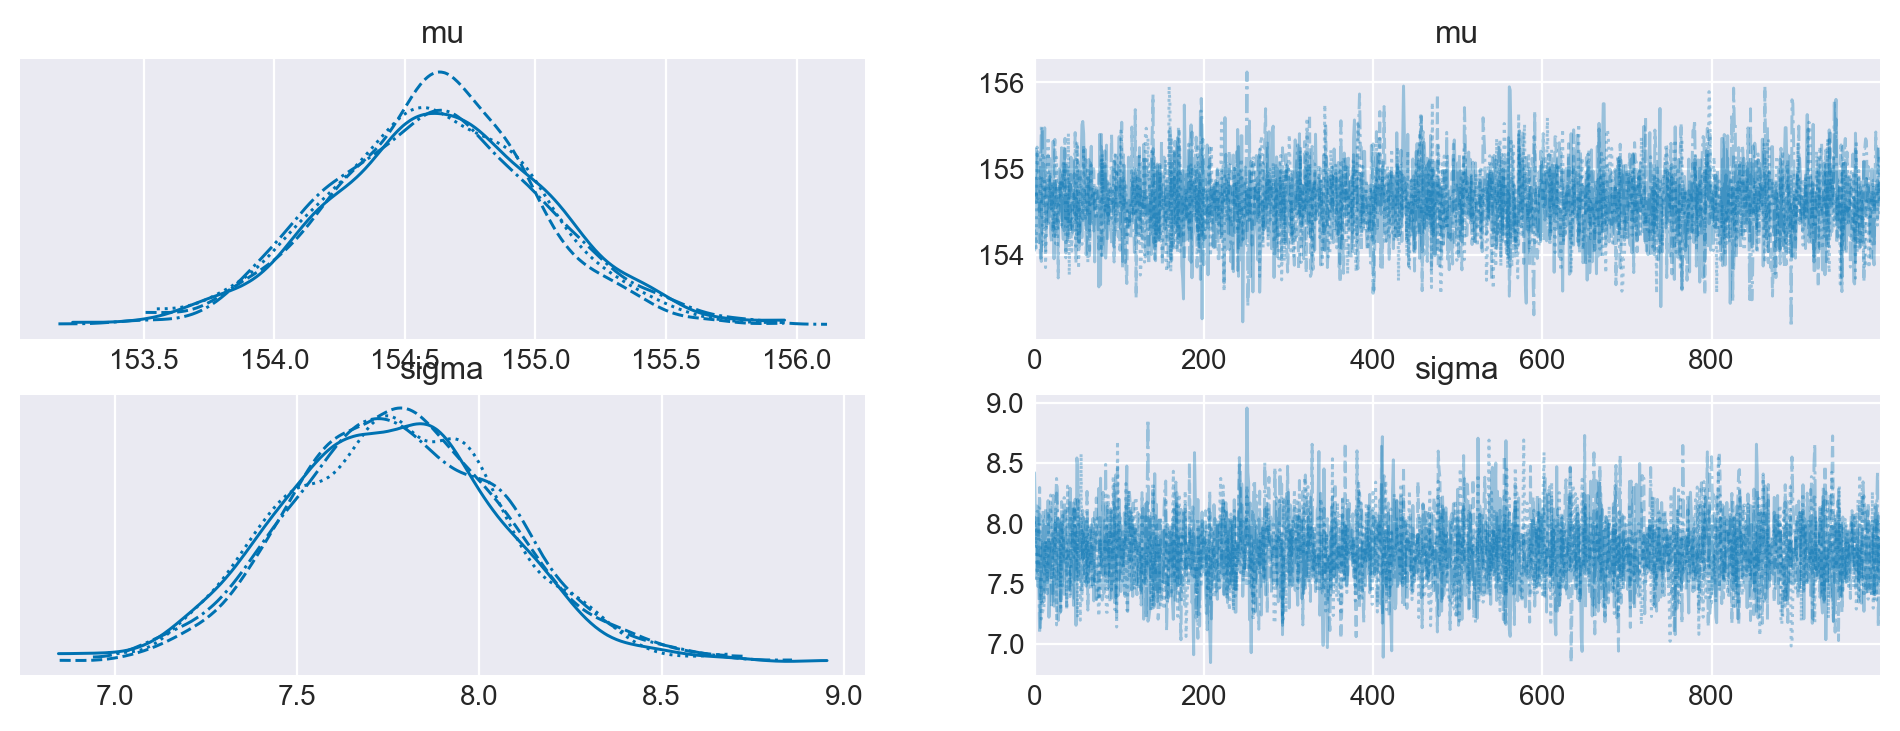

In [ ]:
pm.plot_trace(trace_4_1);

In [ ]:
# we can sample from the multivariate gaussian in this manner

scp.stats.multivariate_normal(pm.summary(trace_4_1)['mean'], trace_4_1_cov).rvs(size=10)

array([[154.4014929 ,   7.76213281],
       [155.20945925,   7.70083966],
       [154.10997189,   7.96089318],
       [154.6427194 ,   7.75983239],
       [155.24706207,   7.86541976],
       [155.3407095 ,   8.04308559],
       [153.48264645,   7.582161  ],
       [154.3870379 ,   7.44569944],
       [154.53024464,   7.6023656 ],
       [154.47225105,   7.29612789]])

In [ ]:
trace_4_1_cov.to_numpy()

array([[0.16802566, 0.00180656],
       [0.00180656, 0.08703225]])

In [ ]:
pm.summary(trace_4_1)['mean']

mu       154.616
sigma      7.770
Name: mean, dtype: float64

In [ ]:
trace_4_1_df.head()


mu     sigma
chain draw                      
0     0     154.053694  8.418688
      1     154.114831  8.023140
      2     154.709011  7.812780
      3     154.222393  8.142382
      4     155.194936  7.473933

Text(0, 0.5, 'weight(kg)')

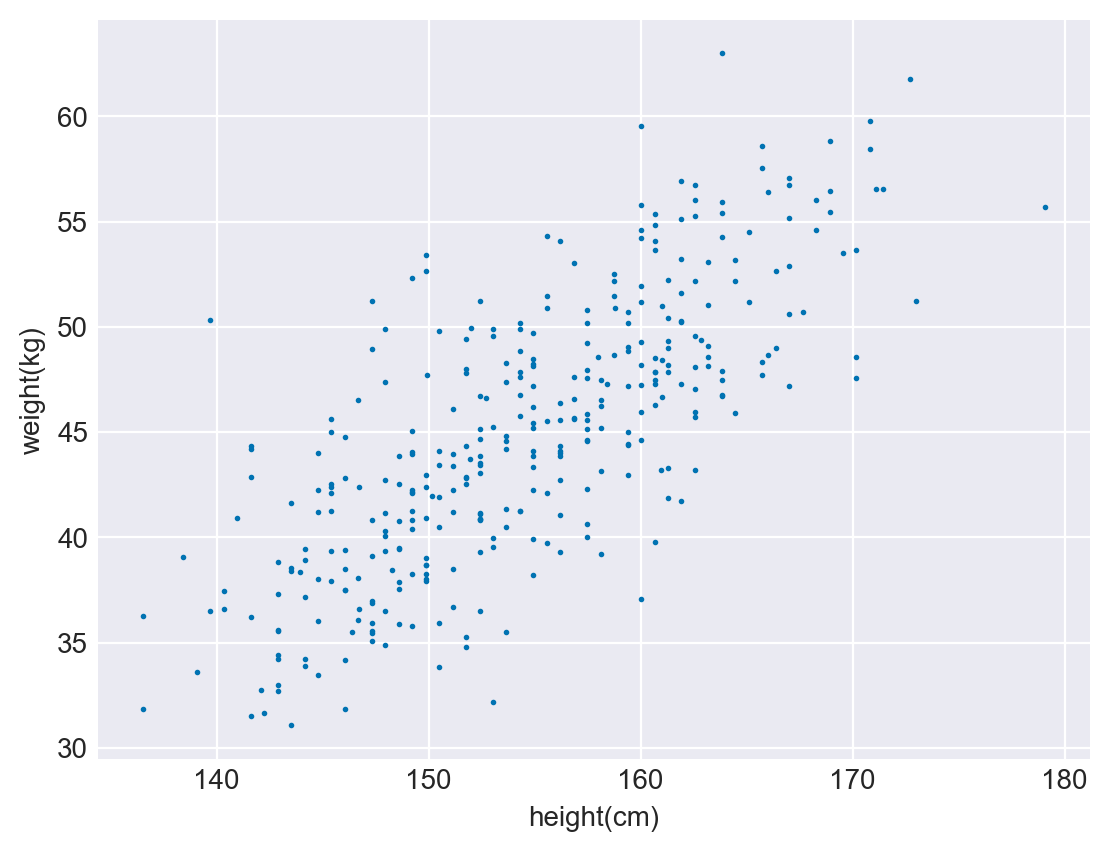

In [ ]:
# Let's just plot height vs weight to see if there is any kind of correlation
# Indeed there is.

plt.scatter(d2.height, d2.weight, s=1)
plt.xlabel('height(cm)')
plt.ylabel('weight(kg)')

This shows us that the priors set for beta are not correct.
Some heights are predicted below 0 and some heights are way over normal


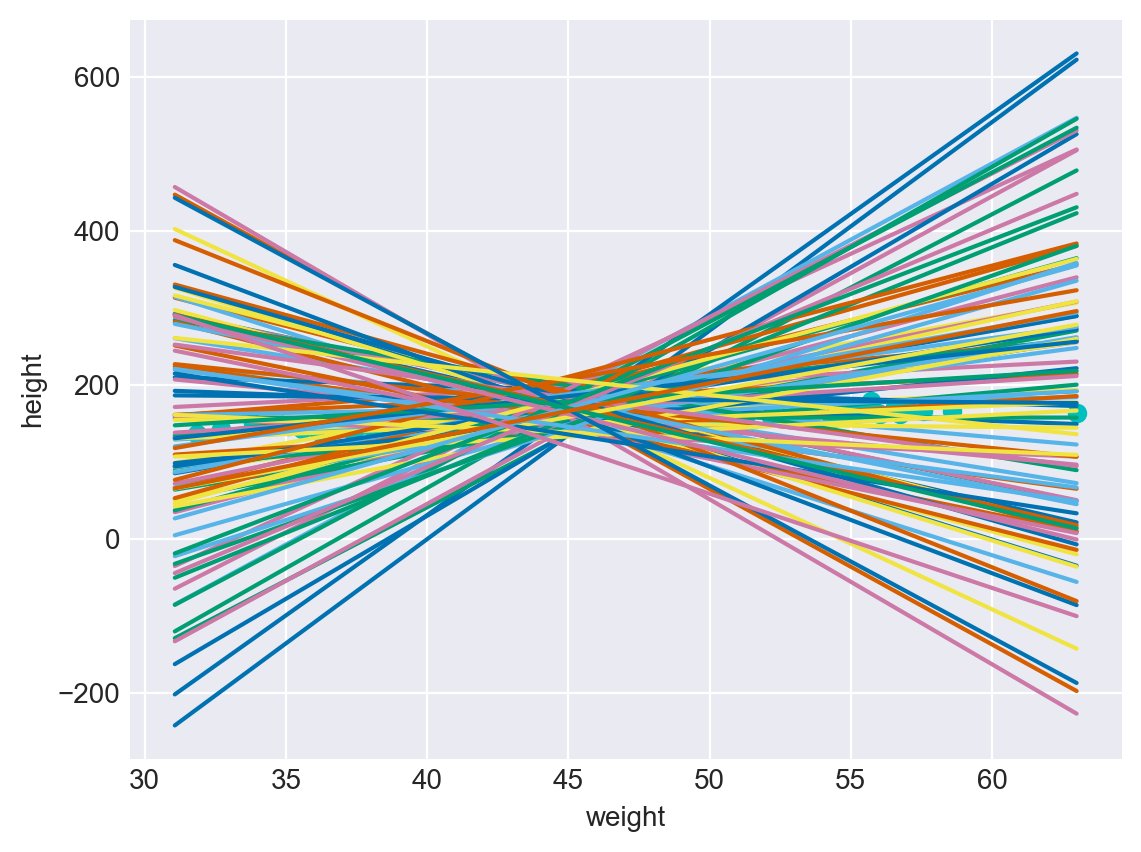

In [ ]:
n = 100
# use random_state to control results exactly
alpha = scp.stats.norm.rvs(170,20, n, random_state=np.random.RandomState(seed=100))
beta = scp.stats.norm.rvs(0,10, n, random_state=np.random.RandomState(seed=101))

xs = np.linspace(d2.weight.min(), d2.weight.max(), n)
x_bar = d2.weight.mean()

print("This shows us that the priors set for beta are not correct.")
print("Some heights are predicted below 0 and some heights are way over normal")
plt.xlabel('weight')
plt.ylabel('height')
plt.plot(d2.weight[:n], d2.height[:n], 'co')
for i in range(n):
    # This is the linear regression
    ys = alpha[i] + beta[i] * (xs - x_bar)
    plt.plot(xs, ys)


The predicted heights are now more sane..


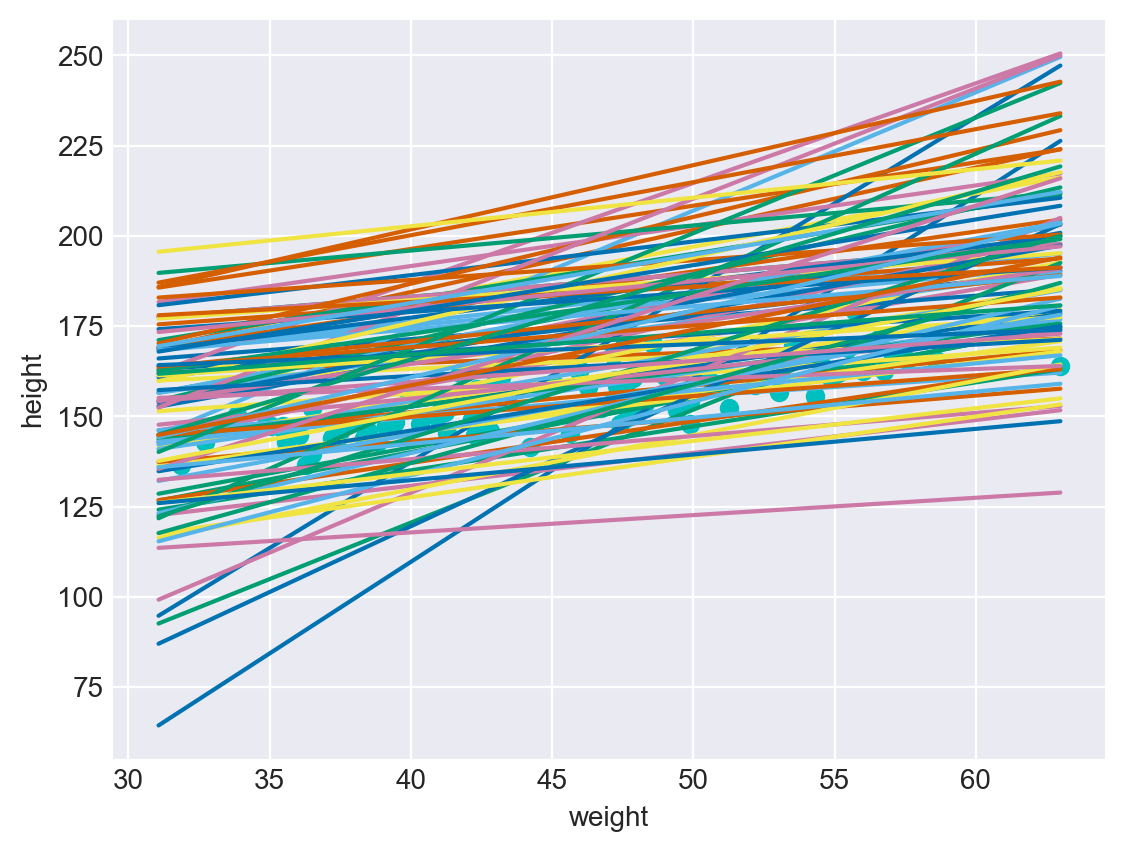

In [ ]:
# Knowing that the previous priors are bad, we restrict heights to positive values
# We do so by using the log normal. Let's see what these values are like:


n = 100
# use random_state to control results exactly
alpha = scp.stats.norm.rvs(170,20, size=n, random_state=np.random.RandomState(seed=100))
beta = scp.stats.lognorm.rvs(0.6, size=n, random_state=np.random.RandomState(seed=101))

xs = np.linspace(d2.weight.min(), d2.weight.max(), n)
x_bar = d2.weight.mean()

print("The predicted heights are now more sane..")
plt.xlabel('weight')
plt.ylabel('height')
plt.plot(d2.weight[:n], d2.height[:n], 'co')
for i in range(n):
    # This is the linear regression
    ys = alpha[i] + beta[i] * (xs - x_bar)
    plt.plot(xs, ys)

In [ ]:
# Now lets try to create a new pymc model to capture this:

def weight_height_model(data):
    with pm.Model() as model:    
        sigma = pm.Uniform('sigma', 0, 50)
        alpha = pm.Normal('alpha', mu=178, sigma=20)
        beta = pm.LogNormal('beta', mu=0, sigma=1)
        # note - getting issues using arrays unless wrapped in np.asarray
        mu = pm.Deterministic('mu', alpha + beta * np.asarray(data.weight-data.weight.mean()))
        height = pm.Normal('height', mu=mu, sigma=sigma, observed=data.height)
        return model, pm.sample()

code4_4_2, trace4_4_2 = weight_height_model(d2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, alpha, beta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 12 seconds.


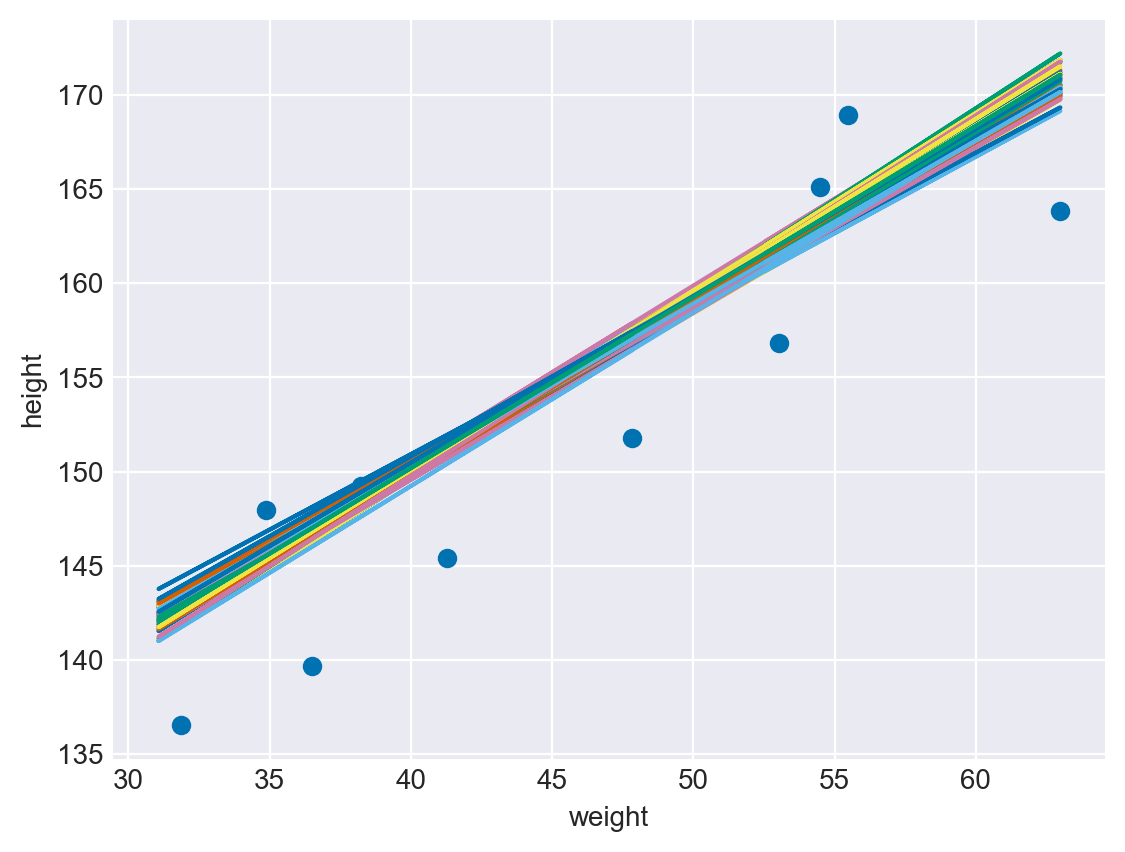

In [ ]:
def plot_weight_height(trace, data, num_lines):
    # plot some real vars
    plt.plot(data.weight[:10], data.height[:10], 'C0o')
    xs = data.weight

    # We sample a random chain. There are 4 chains.
    # Each chain has a draw, we draw 1000 times per chain.
    # In each draw there is 352 values, which matches len(d2.weight)
    num_chains = trace4_4_2.posterior.dims['chain']
    num_draws = trace4_4_2.posterior.dims['draw']
    for i in range(num_lines): 
        ys = trace.posterior.mu[np.random.randint(num_chains)][np.random.randint(num_draws)]
        plt.plot(xs,ys)
    plt.xlabel('weight')
    plt.ylabel('height')

# This validates that our prior is sound, it echos the earlier plot
plot_weight_height(trace4_4_2, d2, 50)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, alpha, beta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 12 seconds.


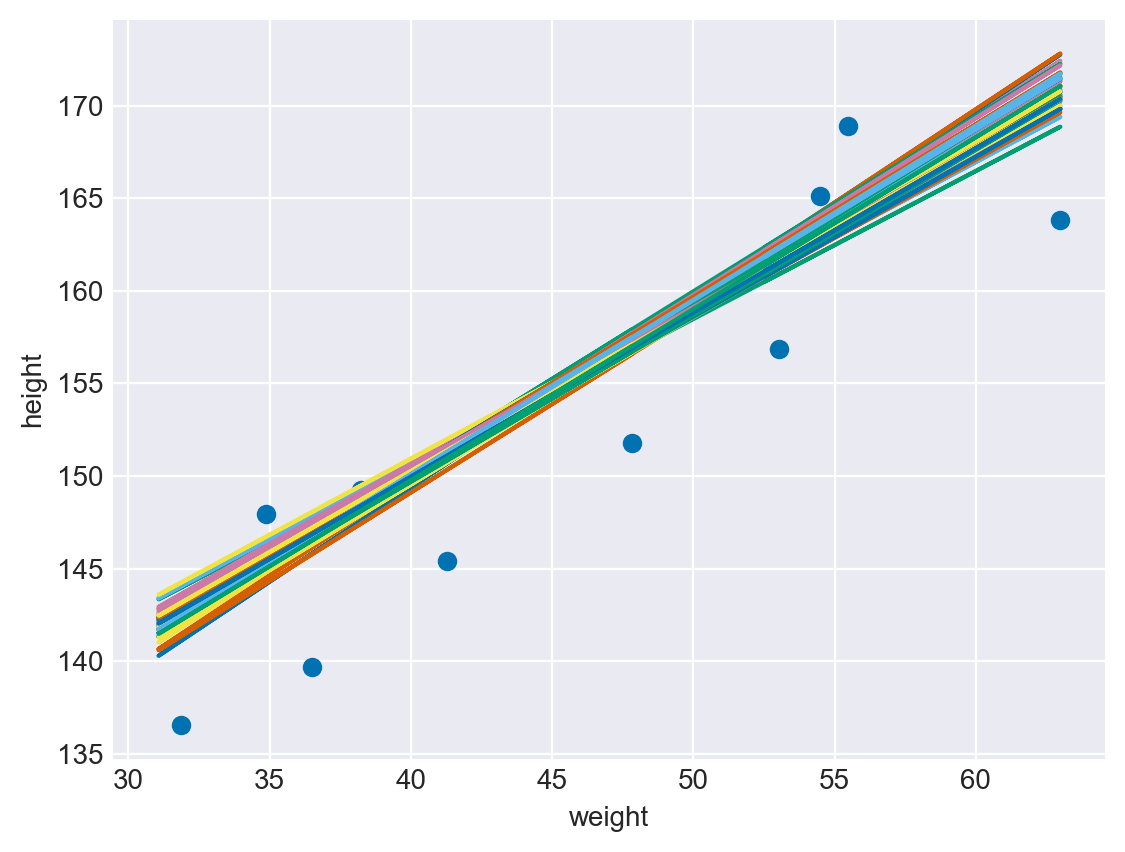

In [ ]:
# Code 4.43
# Want to see something cool? Instead of using the lognormal distribution,
# you can define a parameter that is a logarithm of beta, then account for it in the mu expression

with pm.Model() as code4_43:    
    sigma = pm.Uniform('sigma', 0, 50)
    alpha = pm.Normal('alpha', mu=178, sigma=20)
    beta = pm.Normal('beta', mu=0, sigma=1)
    # note - getting issues using arrays unless wrapped in np.asarray
    mu = pm.Deterministic('mu', alpha + pm.math.exp(beta) * np.asarray(d2.weight-d2.weight.mean()))
    height = pm.Normal('height', mu=mu, sigma=sigma, observed=d2.height)
    trace4_43 = pm.sample()
    
plot_weight_height(trace4_43, d2, 50)

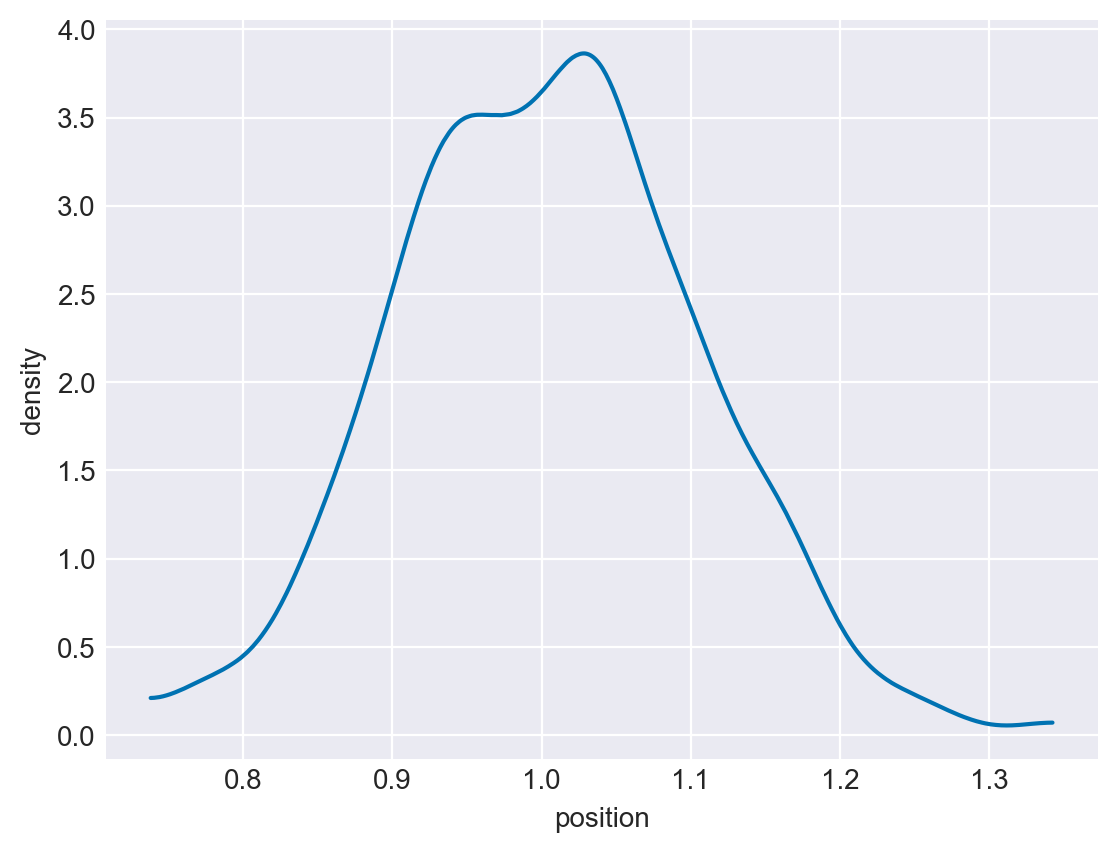

In [ ]:
# lognorm is positive(at least with loc=0, which is the default)
# The first parameter is a 'shape', which I don't yet understand.
density_plot(scp.stats.lognorm.rvs(0.1, size=1000))

[<matplotlib.lines.Line2D>]

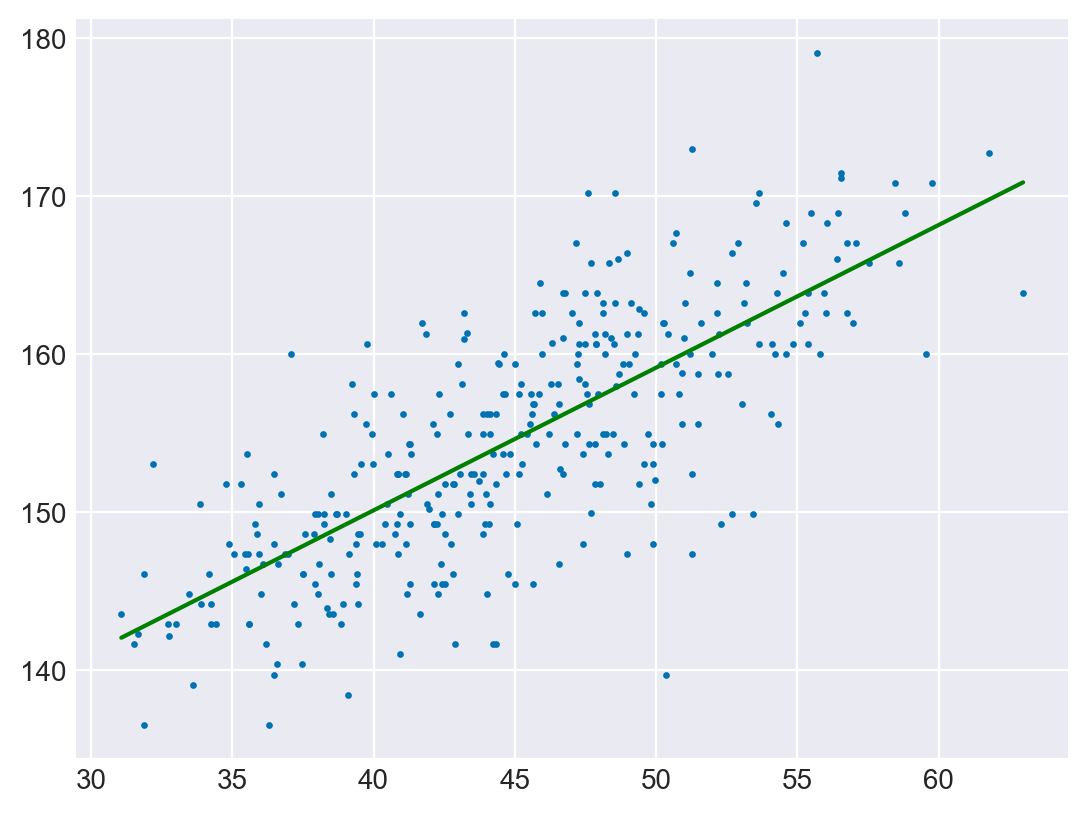

In [ ]:
# 4.4.3.2 Plotting posterior inference against the data

# Plotting posterior inference against the data provides an informal check on model assumptions.
# Summary of parameter statistics is easy when the relationship between the parameters and
# output are clear, but start to break down when the model becomes more complex.

# Plotting helps to visualize this data clearly.
# Let's first start by superimposing the posterior mean values over height and weight data.
plt.scatter(d2.weight, d2.height, s=2)
alpha_mean = trace4_4_2.posterior.alpha.mean().item()
beta_mean = trace4_4_2.posterior.beta.mean().item()

xs = np.linspace(d2.weight.min(), d2.weight.max(), 10)
ys = alpha_mean + beta_mean * (xs - d2.weight.mean())

plt.plot(xs, ys, c='green')

In [ ]:
# Instead of only plotting on the whole data set, lets see how uncertainty decreases
# as we incorporate more and more data
_, trace_10 = weight_height_model(d2[:10])
_, trace_50 = weight_height_model(d2[:50])
_, trace_150 = weight_height_model(d2[:150])
trace_352 = trace4_4_2

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, alpha, beta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 12 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, alpha, beta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 12 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, alpha, beta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 14 seconds.


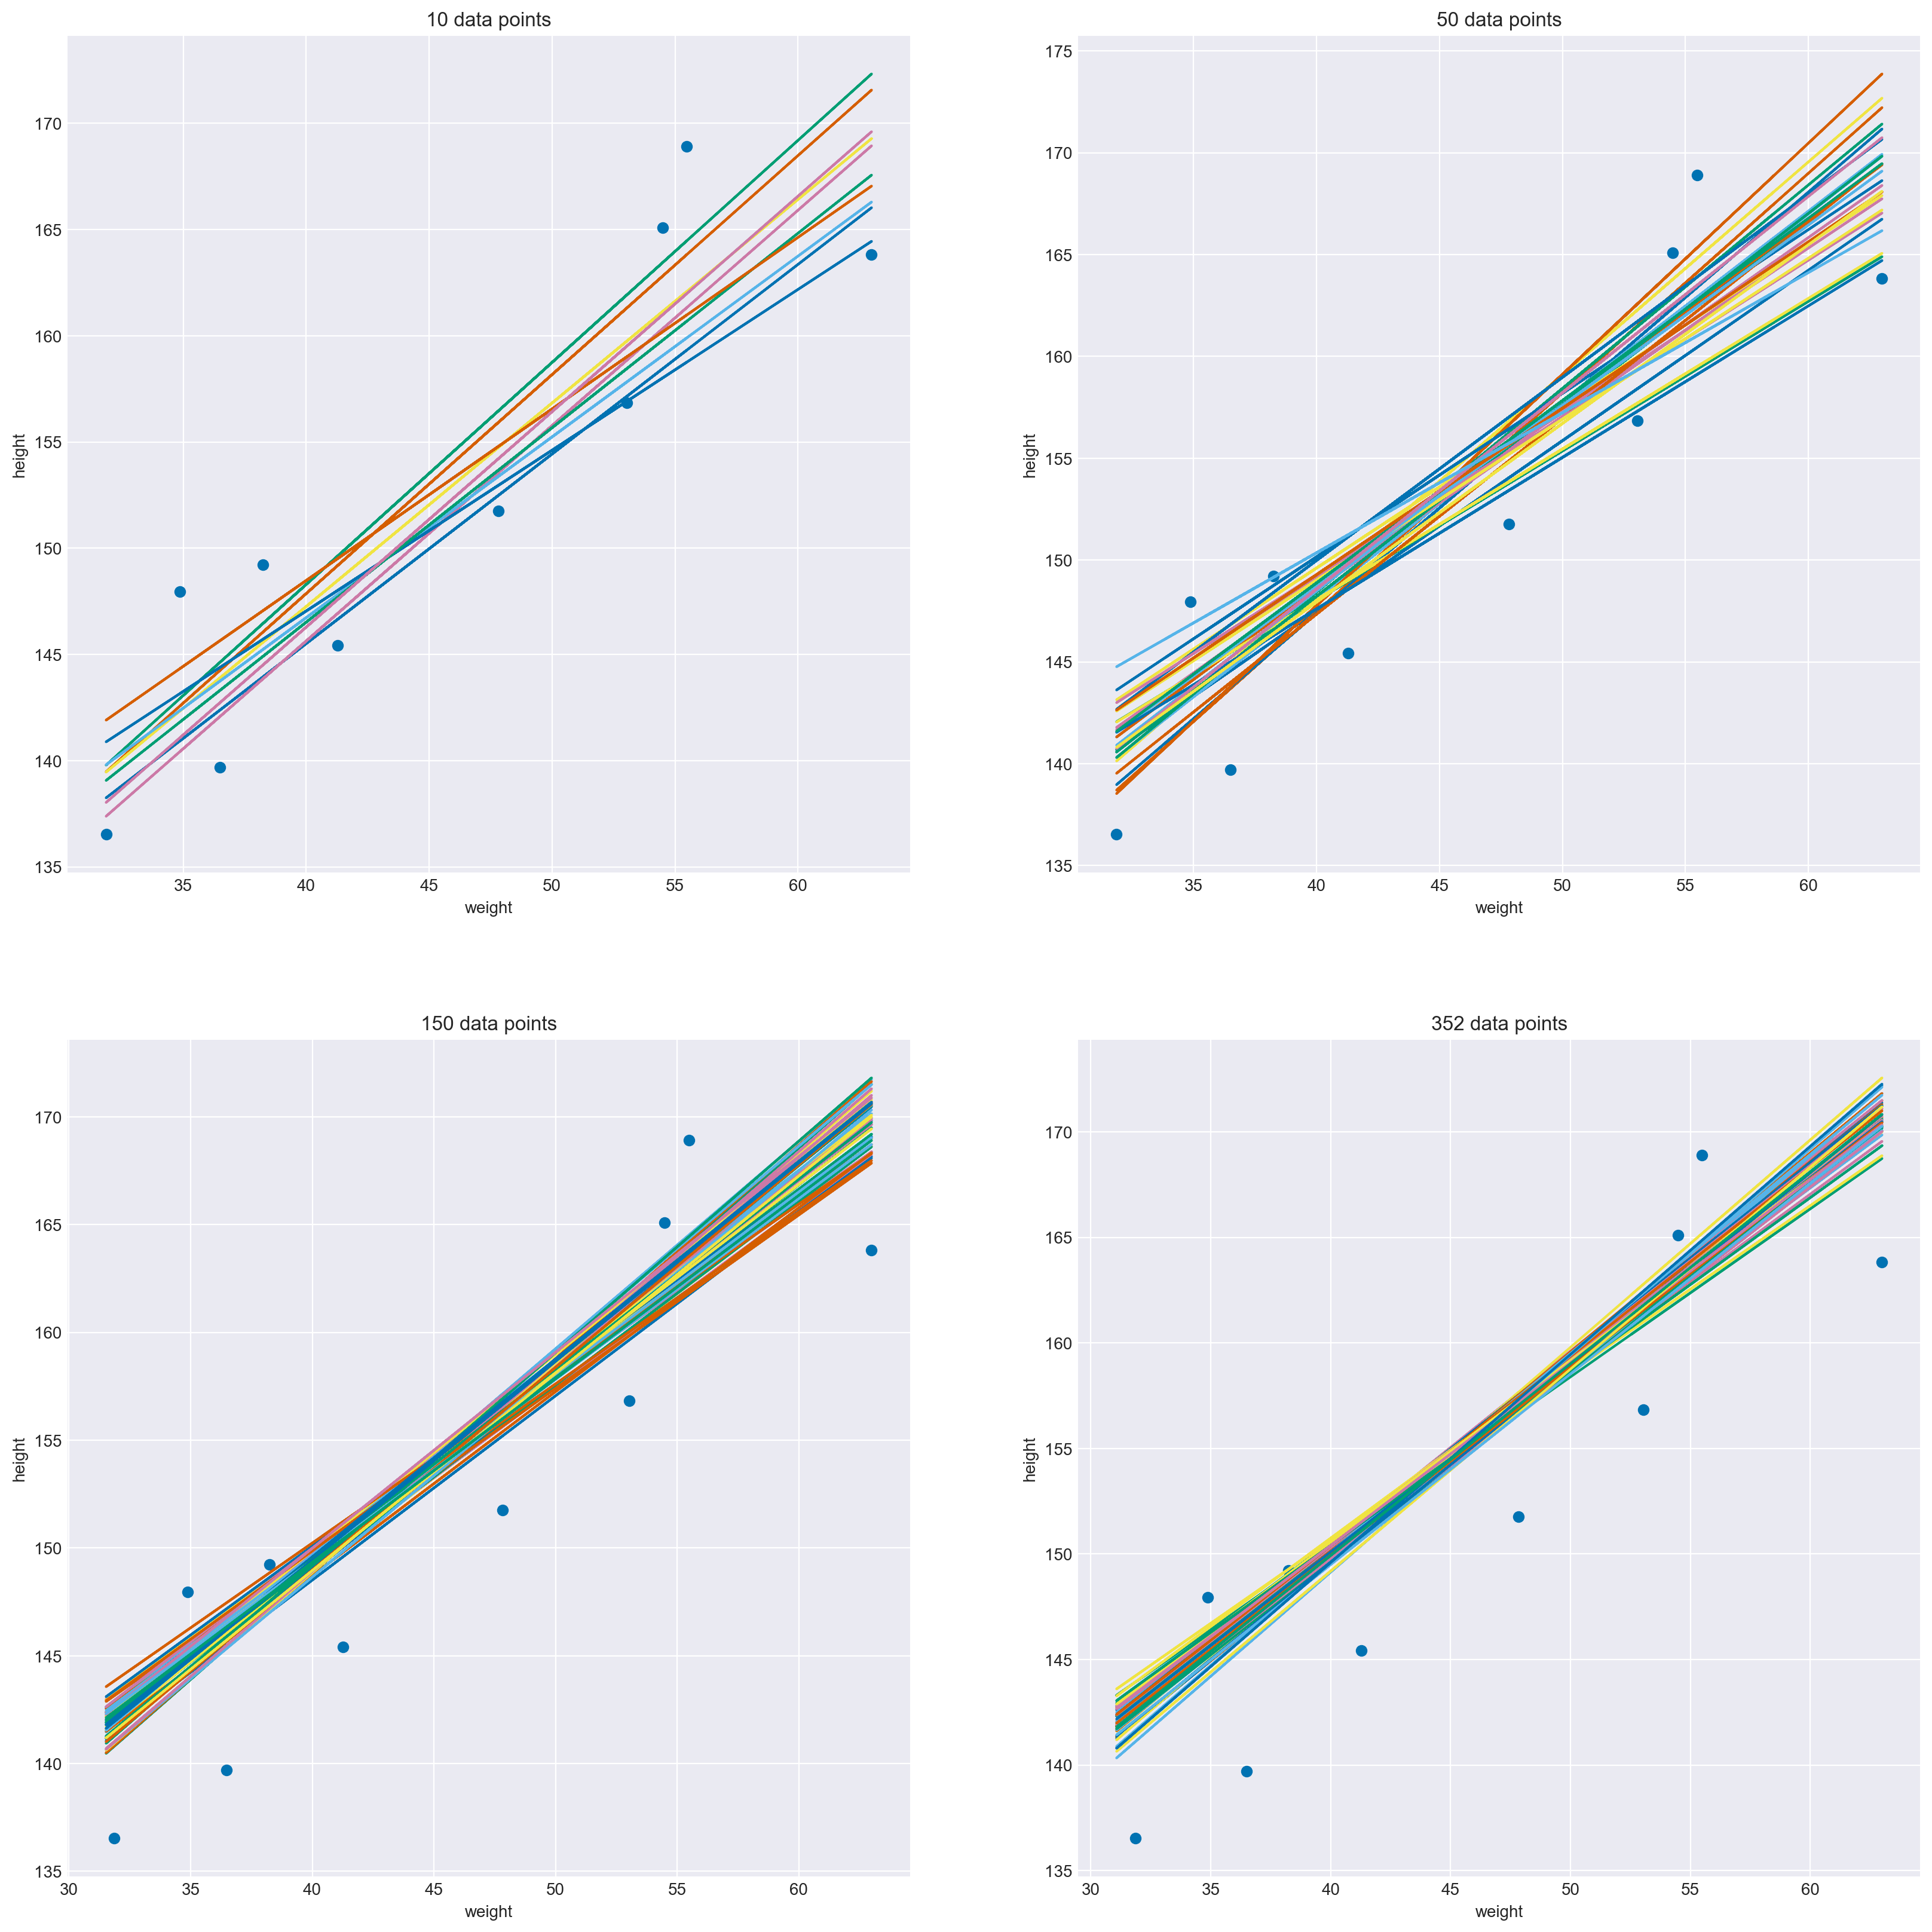

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(2, 2, 1)
plt.title('10 data points')
plot_weight_height(trace_10, d2[:10], 10)

plt.subplot(2, 2, 2)
plt.title('50 data points')
plot_weight_height(trace_50, d2[:50], 30)

plt.subplot(2, 2, 3)
plt.title('150 data points')
plot_weight_height(trace_150, d2[:150], 50)

plt.subplot(2, 2, 4)
plt.title('352 data points')
plot_weight_height(trace_352, d2, 50)

In [ ]:
trace_352.posterior.alpha[:]

<xarray.DataArray 'alpha' (chain: 4, draw: 1000)>
array([[154.53136966, 154.59985523, 154.68013189, ..., 154.74503582,
        154.73480149, 154.44255024],
       [154.6596966 , 154.77865968, 154.9208111 , ..., 154.78429832,
        154.50989226, 154.37729918],
       [154.70288675, 154.38958753, 154.94223978, ..., 154.55938564,
        154.55302493, 154.38666162],
       [154.78242661, 154.48237299, 154.47094506, ..., 154.82869378,
        154.73298774, 154.38350135]])
Coordinates:
  * chain    (chain) int64 0 1 2 3
  * draw     (draw) int64 0 1 2 3 4 5 6 7 8 ... 992 993 994 995 996 997 998 999

89% of the ways for the model to produce height conditional on weight = 50 and data falls between 158.61 and 159.82


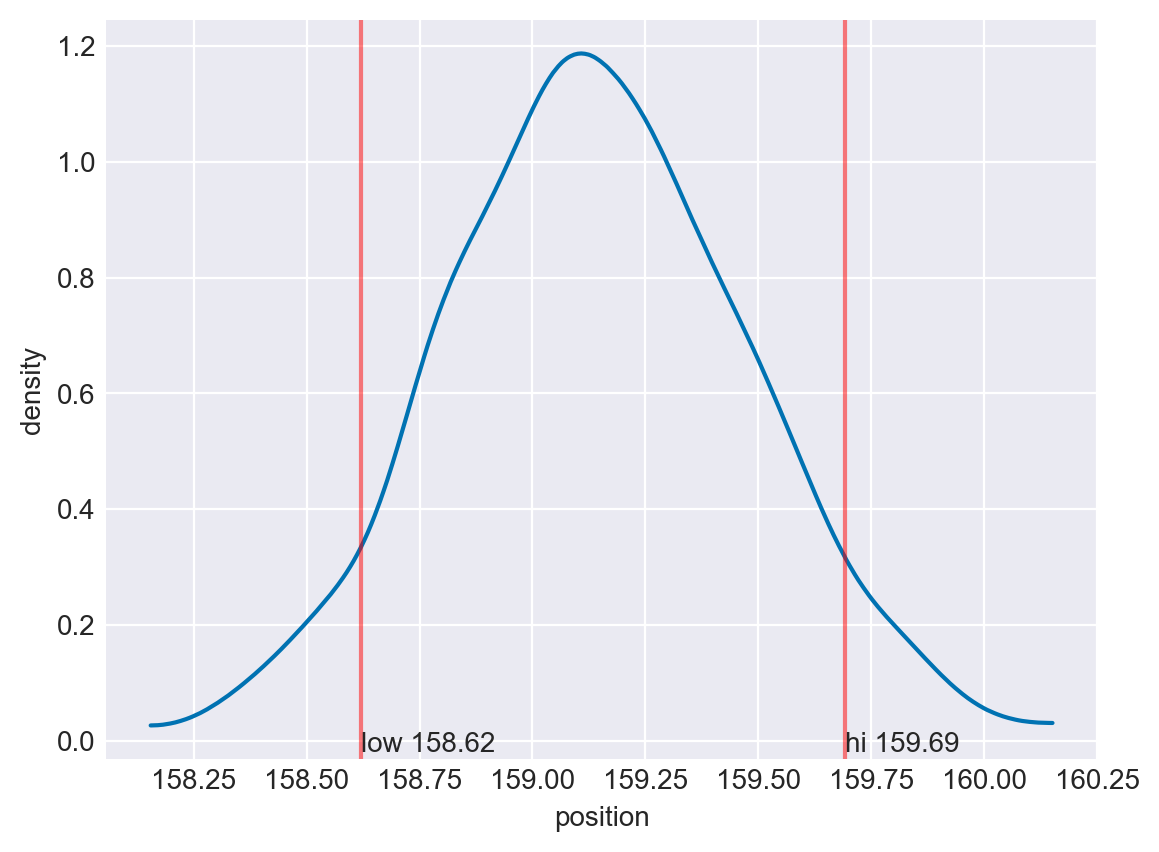

In [ ]:
# Code 4.50

# here we just use [0], which is the first chain.
mu_at_50 = trace_352.posterior.alpha[0] + trace_352.posterior.beta[0] * (50 - d2.weight.mean())

low, hi = az.hdi(mu_at_50.values,hdi_prob=0.89)
density_plot(mu_at_50.values)
t = plt.gca().get_xaxis_transform()
plt.axvline(low, color = 'red', alpha=0.5)
plt.text(low, .01, f'low {low:.2f}', transform=t)
plt.axvline(hi, color = 'red', alpha=0.5)
plt.text(hi, .01, f'hi {hi:.2f}', transform=t)

print("89% of the ways for the model to produce height conditional on weight = 50 and data falls between 158.61 and 159.82")

In [ ]:
# Now, instead of just plotting for one data point, at 50kg, we want to plot for every data point.
# At this point, the code in the book uses link, but we don't have such code.

# This is the same as what created trace_4_4_2
with pm.Model() as trace_test:    
    sigma = pm.Uniform('sigma', 0, 50)
    alpha = pm.Normal('alpha', mu=178, sigma=20)
    beta = pm.LogNormal('beta', mu=0, sigma=1)
    weight_mean = d2.weight.mean()
    
    # The difference with the above is this line, which allows us to set this data to something else
    # for posterior predictive checks.
    pred = pm.MutableData("pred", d2.weight)
    mu = pm.Deterministic('mu', alpha + beta * (pred - weight_mean))
    height = pm.Normal('height', mu=mu, sigma=sigma, observed=d2.height)
    trace_sample = pm.sample()


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, alpha, beta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 10 seconds.


In [ ]:
# Now we run the model using an arbitary set of inputs to run a posterior predictive check
# We use this to verify how well our model is doing, to test assumptions.
# weight_seq will be fed into the model, and predictions=true. We also tell the model what
# variables we want to simulate, mu in this case.
weight_seq = np.arange(25, 70)
pm.set_data({"pred": weight_seq}, model=trace_test)
trace_with_predictions = pm.sample_posterior_predictive(
                            trace_sample,
                            model=trace_test,
                            # var_names tells us the variables that we want to generate samples for
                            var_names=['mu'],
                            predictions=True
                            )

Sampling: []


Notice that the amount of uncertainty depends on the value of weight.


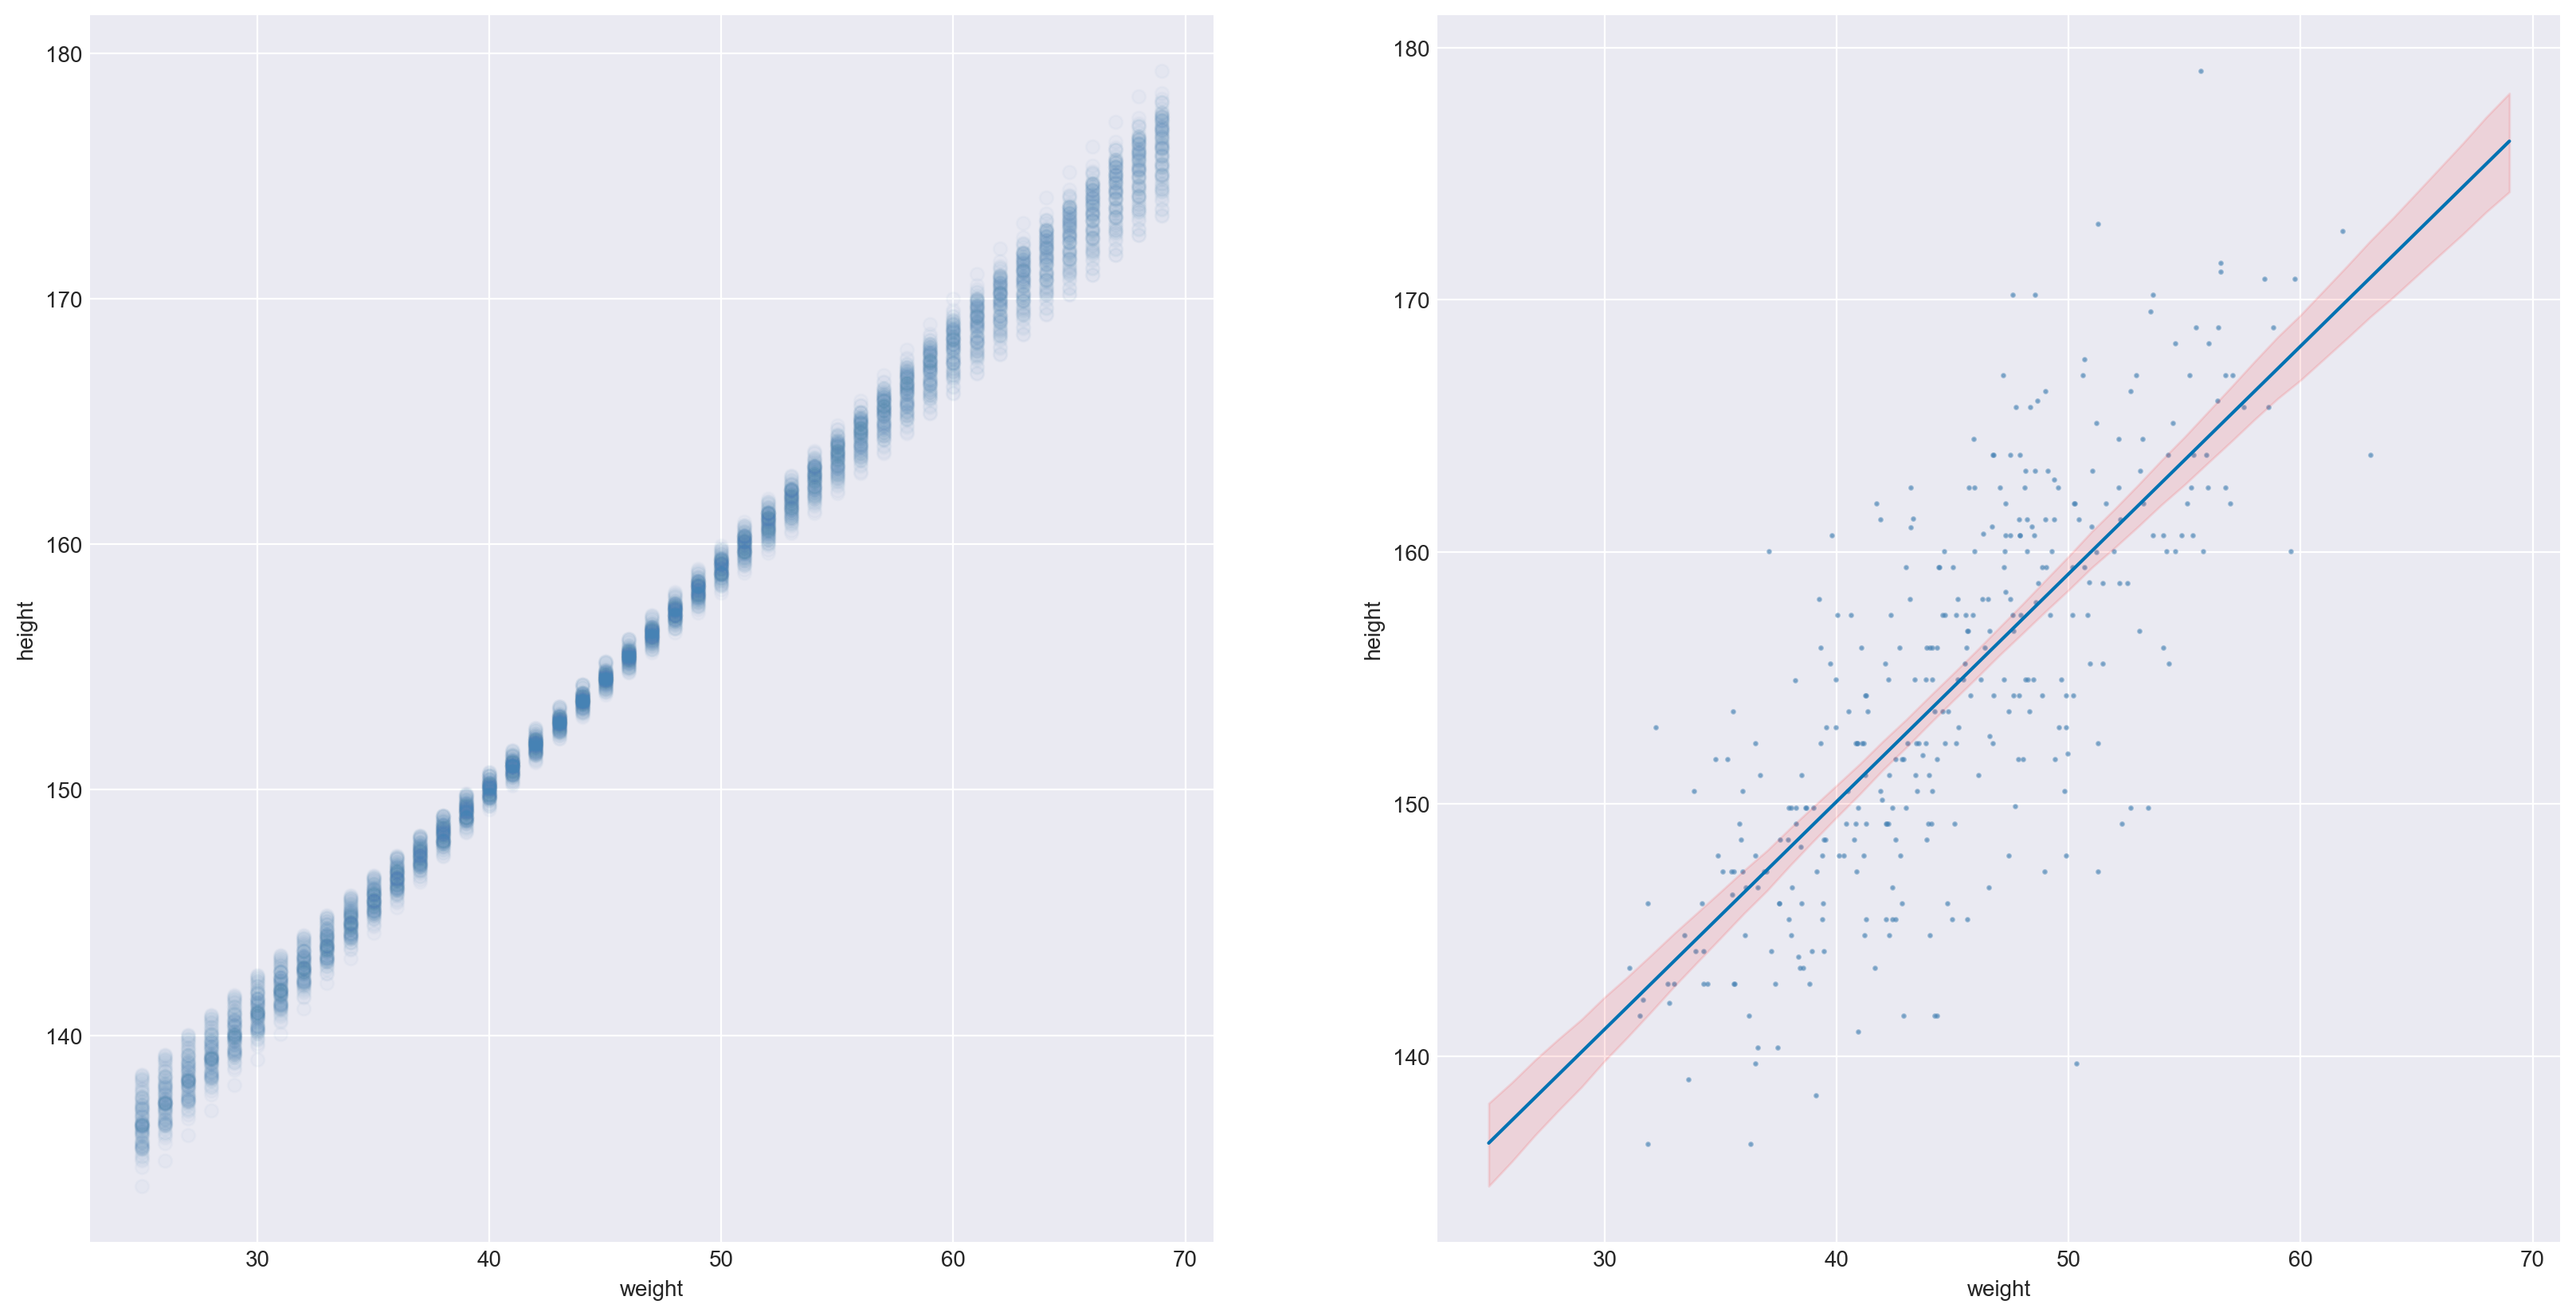

In [ ]:
print("Figure 4.9 Notice that the amount of uncertainty depends on the value of weight.")

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.xlabel('weight')
plt.ylabel('height')

# Since we have 4 chains, 1000 draws, its a little crazy, lets just sample a 100 draws.
mus = trace_with_predictions.predictions.mu.to_numpy()
n_chain, n_draw, n_mu = mus.shape

for i in range(100):
    mu = mus[np.random.randint(n_chain), np.random.randint(n_draw)]
    plt.scatter(weight_seq, mu, c='steelblue', alpha=0.03)


plt.subplot(1, 2, 2)

plt.xlabel('weight')
plt.ylabel('height')


# Plot the samples
plt.scatter(d2.weight, d2.height, c='steelblue', alpha=0.5, s=2)

# Summarize the distribution(this time we will just use all of the data)
mu_means = trace_with_predictions.predictions.mean(dim=['chain', 'draw'])
plt.plot(weight_seq, mu_means.mu)

# Calculate the minimum bayesian credible interval(highest probability density interval)
# and plot it
mu_hpdi = az.hdi(trace_with_predictions.predictions).mu
plt.fill_between(weight_seq, mu_hpdi[:,0], mu_hpdi[:,1], alpha=0.1, color='red')

plt.show()


Notice how tight the 89% interval is. There is little uncertainty
about the avg height as a function of the avg weight. But inferences
are always conditional on the model. What this line is saying is:
Conditional upon the assumption that height and weight are related
using a straight line, here is the most plausible line, and these are
its most plausible bounds.



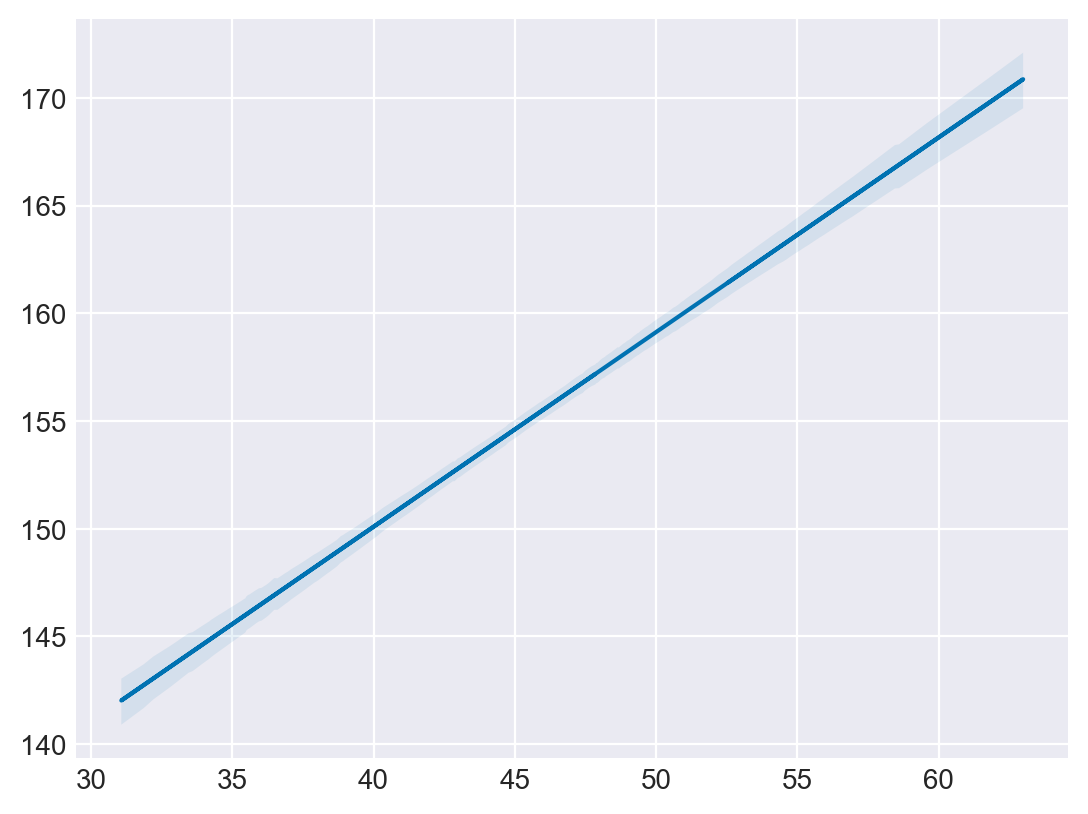

In [ ]:
# This code is from 4.4.3.5., Prediction intervals.
# Instead of having sim, we already have the posterior distribution for mu, so we sample from it directly.

# trace_352.posterior.mu has 352 mu's per draw, 1000 draws per chain, and 4 chains in total.
# We get the mean for each chain and draw, resulting in 352 results 
# mean across all chains and draws
mu_mean = trace_352.posterior.mu.mean(['chain', 'draw'])

# 89 hdi across all chains and draws
mu_89hdi = az.hdi(trace_352.posterior.mu, hdi_prob=0.89)


# fill_between requires values to be sorted. Another sorting method is to use
# np.argsort(d2.weight), then index the values above.
sort_idx = np.argsort(d2.weight)
sorted_mu89hdi = mu_89hdi.mu.values[sort_idx]
mu_89hdi_lo = mu_89hdi.mu.values[sort_idx][:, 0]
mu_89hdi_hi = mu_89hdi.mu.values[sort_idx][:, 1]
plt.plot(d2.weight, mu_mean)
plt.fill_between(d2.weight[sort_idx], mu_89hdi_lo, mu_89hdi_hi, alpha=0.09)
print("""
Notice how tight the 89% interval is. There is little uncertainty
about the avg height as a function of the avg weight. But inferences
are always conditional on the model. What this line is saying is:
Conditional upon the assumption that height and weight are related
using a straight line, here is the most plausible line, and these are
its most plausible bounds.
""")



In [ ]:
# This is an example of how a trace can be thinned. We might want to do this
# if sampling is expensive. this keeps every 10th draw
trace_352_thinned = trace_352.sel(draw=slice(None, None, 10))


samples = pm.sample_posterior_predictive(trace_352_thinned, model=code4_4_2)
samples_hdi89 = az.hdi(samples.posterior_predictive.height, hdi_prob=0.89)

Sampling: [height]


<matplotlib.collections.PolyCollection>

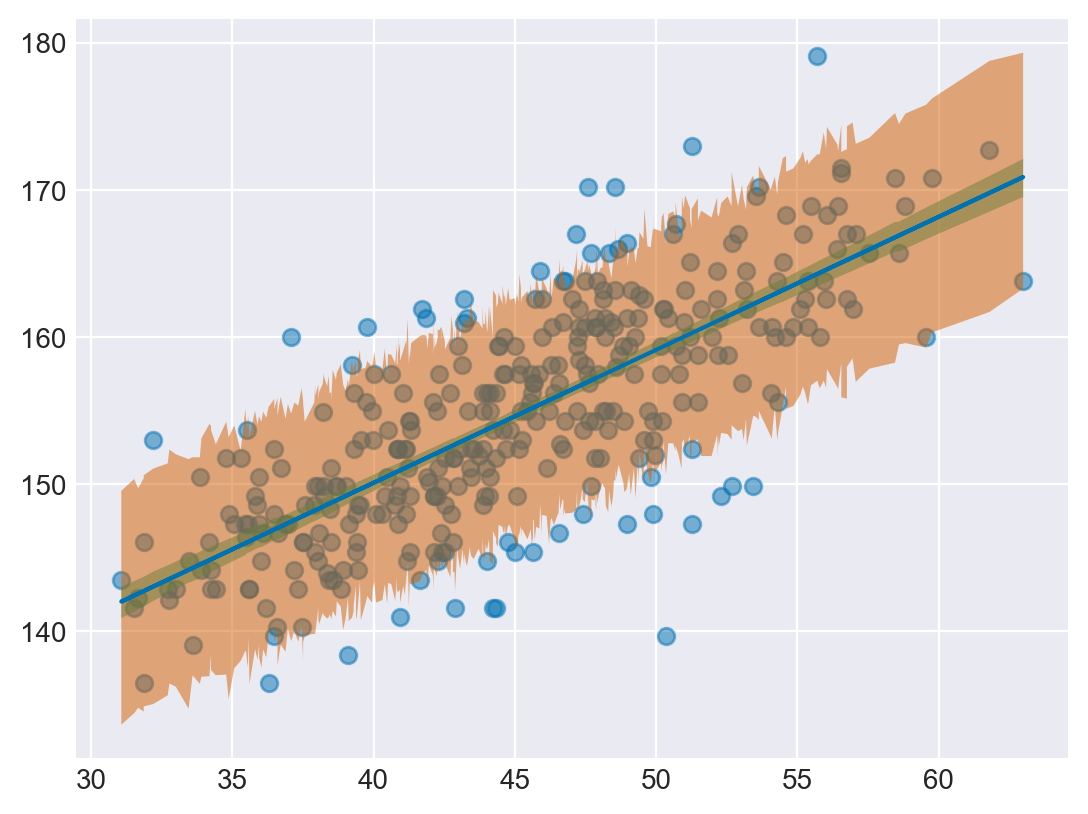

In [ ]:
# sort weight values because fill_between does not work otherwise
sort_idx = np.argsort(d2.weight)

# plot the values
plt.scatter(d2.weight, d2.height, alpha=0.5)

# plot the mean of the posterior distribution
plt.plot(d2.weight, mu_mean)

# plot the 89% interval of the mean of posterior
plt.fill_between(d2.weight[sort_idx], mu_89hdi_lo, mu_89hdi_hi, alpha=0.5)

# plot the 89% interval of the samples
samples_hdi89_sorted = samples_hdi89.height.values[sort_idx]
plt.fill_between(d2.weight[sort_idx], samples_hdi89_sorted[:,0], samples_hdi89_sorted[:,1], alpha=0.5)

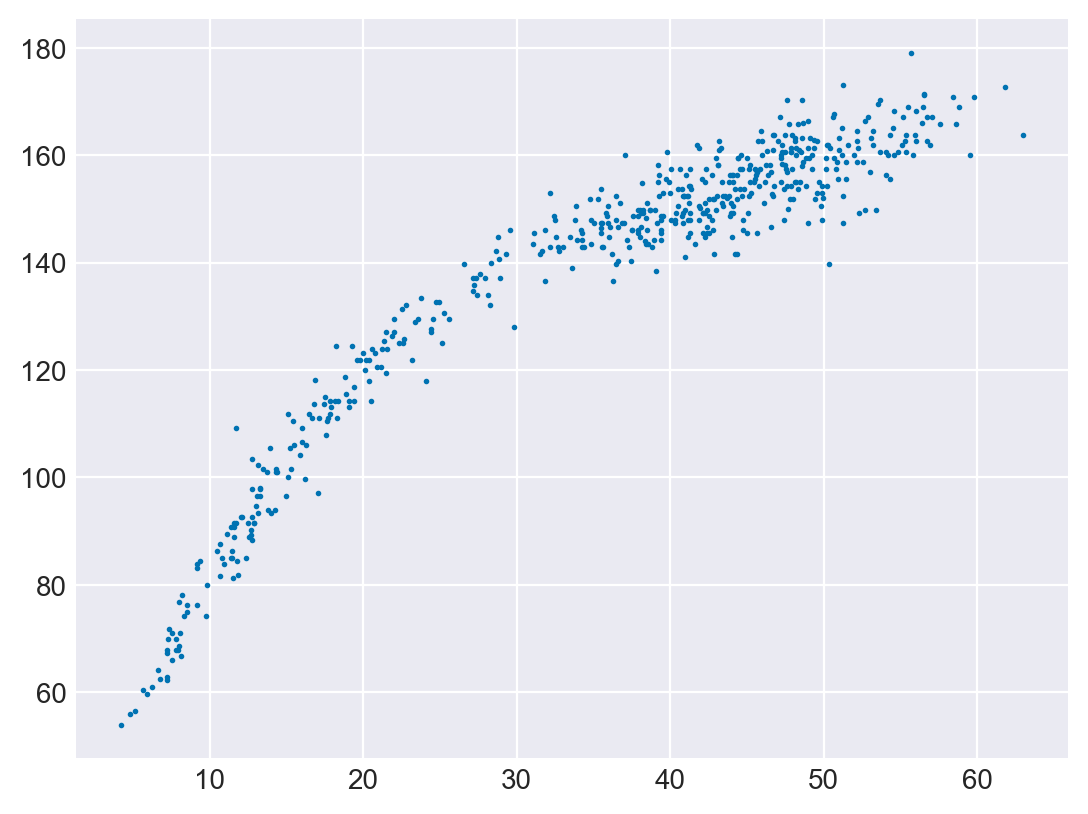

In [ ]:
# For the next part, we will try to model using polynomial regression
# look at the shape of the full data:

sort_idx = np.argsort(d.weight)
plt.scatter(d.weight[sort_idx], d.height[sort_idx], s=1, )
plt.show()

In [ ]:
# When building a polynomial regression, remember to standardize predictor variables, because
# there can be numerical glitches when the predictor have large values
d['weight_s'] = (d.weight - d.weight.mean()) / d.weight.std()

with pm.Model() as code4_65:
    b1 = pm.LogNormal('b1', mu=0, sigma=1)
    b2 = pm.Normal('b2', mu=0, sigma=1)
    a = pm.Normal('a', mu=178, sigma=20)
    sigma = pm.Uniform('sigma', 0, 50)
    weight_s = pm.MutableData("weight_s", d.weight_s)
    
    mu = pm.Deterministic('mu', a + b1 * weight_s + b2 * np.power(weight_s, 2))
    h = pm.Normal('h', mu=mu, sigma=sigma, observed=d.height)
    trace4_65 = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b1, b2, a, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 12 seconds.


In [ ]:
print('This summary now doesn\'t really tell us much, because we cannot directly interpret the meaning of b1 and b2')
pm.summary(trace4_65, var_names=['a', 'b1', 'b2', 'sigma']) # var_names supplied simply to order the output

This summary now doesn't really tell us much, because we cannot directly interpret the meaning of b1 and b2


mean     sd   hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
a      146.047  0.380  145.298  146.707      0.008    0.006    2319.0   
b1      21.739  0.286   21.234   22.313      0.006    0.004    2652.0   
b2      -7.794  0.285   -8.316   -7.222      0.006    0.004    2332.0   
sigma    5.798  0.178    5.469    6.127      0.003    0.002    3095.0   

       ess_tail  r_hat  
a        2426.0    1.0  
b1       3295.0    1.0  
b2       2598.0    1.0  
sigma    3062.0    1.0

In [ ]:
# So, let's attempt to visualize the posterior. Let's visualize the uncertainty in mu.
# The book uses the range -2.2 - 2.0 without explaining, but this is why:
# d.weight_s.min(), d.weight_s.max() is (-2.13, 1.86)
# Also note that these are the standardized predictor values, so they should not fall outside more than -3,3

# **IMPORTANT** Somehow simulating anything other than mu significantly changes the posterior. For example
# if sampling 'sigma', sigma's mean suddenly changed from 5.7 to 25
weight_seq = np.linspace(-2.5, 2.5, 30)
pm.set_data({"weight_s": weight_seq}, model=code4_65)
code4_65_predictions = pm.sample_posterior_predictive(
                            trace4_65,
                            model=code4_65,
                            var_names=['mu'],
                            predictions=True
                            )



Sampling: []


Sampling: [a, b1, b2, sigma]


In [ ]:
# Also, it is not possible it seems to simulate the output variable(height) directly.
# Somehow, there seems to be some kind of dimensionality mismatch. To simulate the output variable,
# I will just get the simulate mu and sigma, and use it to sample a normal, essentially mimicking this line
# in the model:
# h = pm.Normal('h', mu=mu, sigma=sigma, observed=d.height)

# Too difficult to sample from the posterior, just take a random chain
thinned = trace4_65.posterior.isel(chain=3)

# Have to do this otherwise the broadcasting doesn't work properly
weight_seq_t = np.expand_dims(weight_seq, 0).T

sim_mus = thinned.a.to_numpy() + thinned.b1.to_numpy() * weight_seq_t + thinned.b2.to_numpy() * np.power(weight_seq_t, 2)
sim_sigmas = thinned.sigma.to_numpy()

sim_heights_manual = scp.stats.norm.rvs(sim_mus, sim_sigmas).T
sim_heights_manual_ds = az.convert_to_dataset(np.expand_dims(sim_heights_manual,0))

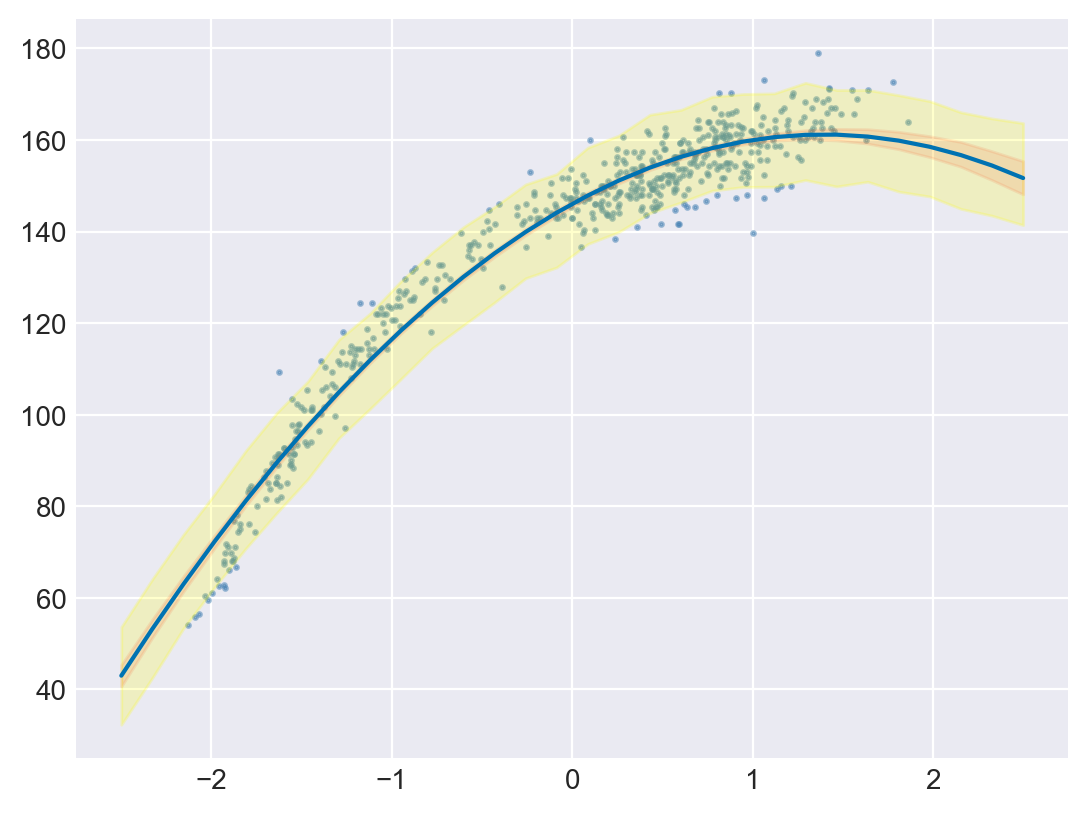

In [ ]:
plt.scatter(d.weight_s, d.height, c='steelblue', alpha=0.5, s=2)

# Summarize the distribution(this time we will just use all of the data)
mu_means = code4_65_predictions.predictions.mu.mean(dim=['chain', 'draw'])
plt.plot(weight_seq, mu_means)

# Plot the 93% hdpi of simulated mus. 93% is completely arbitary
mu_hpdi = az.hdi(code4_65_predictions.predictions, 0.93).mu
plt.fill_between(weight_seq, mu_hpdi[:,0], mu_hpdi[:,1], alpha=0.1, color='red')

# Plot the 93% hdpi of simulated heights
heights_hdpi = az.hdi(sim_heights_manual_ds, 0.93).x
plt.fill_between(weight_seq, heights_hdpi[:, 0], heights_hdpi[:, 1], alpha=0.2, color='yellow')

plt.show()

In [ ]:
# 4.5.2 Splines
# Load cherry blossom data to work with splines

c = pd.read_csv('data/cherry_blossoms.csv', sep=',')
c.describe()

year         doy         temp   temp_upper   temp_lower
count  1215.000000  827.000000  1124.000000  1124.000000  1124.000000
mean   1408.000000  104.540508     6.141886     7.185151     5.098941
std     350.884596    6.407036     0.663648     0.992921     0.850350
min     801.000000   86.000000     4.670000     5.450000     0.750000
25%    1104.500000  100.000000     5.700000     6.480000     4.610000
50%    1408.000000  105.000000     6.100000     7.040000     5.145000
75%    1711.500000  109.000000     6.530000     7.720000     5.542500
max    2015.000000  124.000000     8.300000    12.100000     7.740000

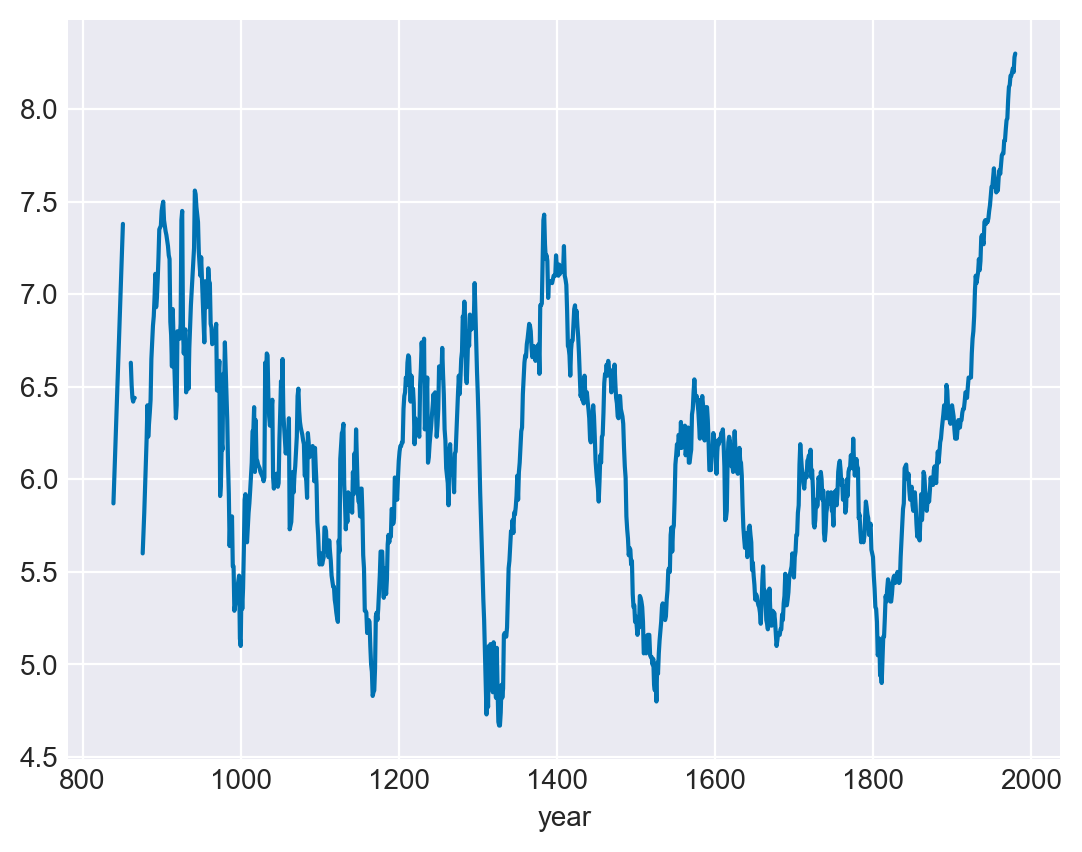

In [ ]:
# Try to plot temp against year and see what happens
# It's super wiggly, linear regression is not going to work
plt.xlabel('year')
plt.ylabel('')
plt.plot(c.year, c.temp)
plt.show()

In [ ]:
# Pick some knots, use quantiles to decide how many knots to use.
c2 = c.dropna(subset='temp')

In [ ]:
print('Do some sanity data checks, we see some years missing...')
print(f'len of dataframe = {len(c2)}, num of years = {c2.year.max() - c2.year.min()}')
years = set(c2.year)
all_years = set(range(c2.year.min(), c2.year.max()+1))
print(f'missing years: {all_years - years}')

Do some sanity data checks, we see some years missing...
len of dataframe = 1124, num of years = 1141
missing years: {867, 868, 869, 870, 871, 872, 873, 874, 875, 852, 853, 854, 855, 856, 857, 858, 859, 860}


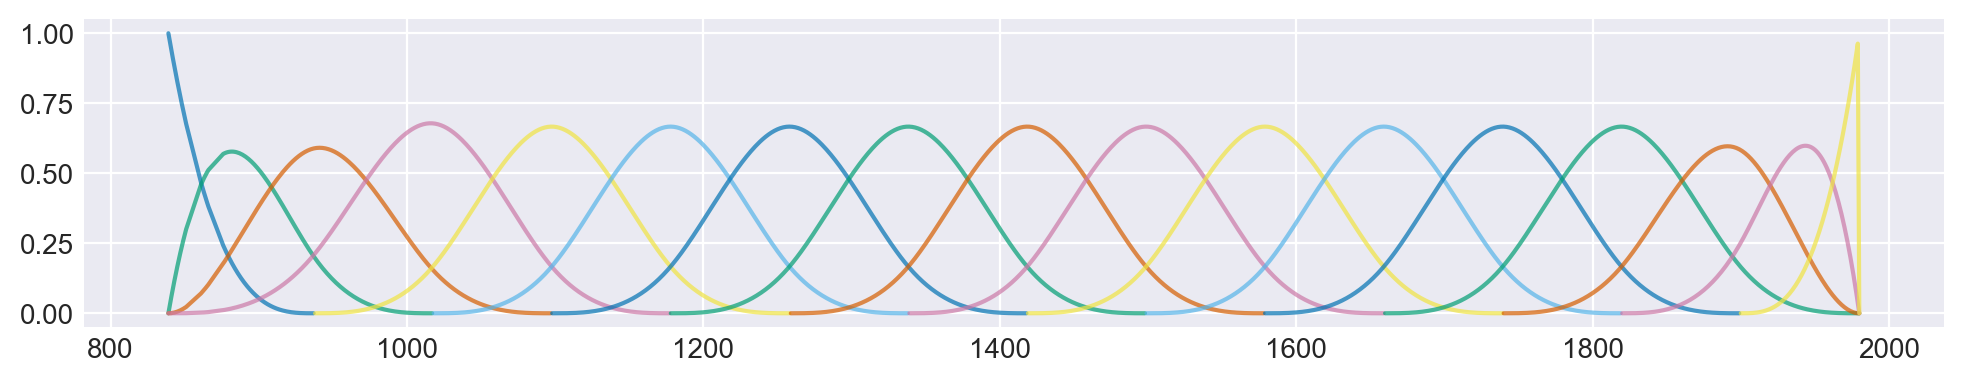

In [ ]:
from scipy.interpolate import BSpline

# Very hard to understand the construction of the spline, not as straightforward as in R, but first
# we get the knots
knots = c2.year.quantile(np.linspace(0, 1, 15)).values

# We repeat a couple of elements. How many elements is unclear, but perhaps because degree is 3
numpyknots = np.concatenate((np.repeat(knots[0], 3),knots, np.repeat(knots[-1], 3)))


# num of knots + 1 on each end
B = np.zeros((len(c2), len(knots)+2))

for i in range(len(knots)+2):
    # deg = 3 is implied by the length of the internal knots - 2
    B[:,i] = BSpline.basis_element(numpyknots[i:i+5], extrapolate=False)(c2.year)


plt.figure(figsize=(12, 2))
plt.plot(c2.year, B, alpha=0.7)
plt.show()

In [ ]:
with pm.Model() as model4_76:
    a = pm.Normal('a', mu=6, sigma=10)
    w = pm.Normal('w', mu=0, sigma=1, shape=B.shape[1])
    sigma = pm.Exponential('sigma', 1)
    mu = pm.Deterministic('mu', a + pm.math.dot(B, w))
#     t = pm.Normal('t', mu=mu, sigma=sigma, observed=c2.temp)
    trace4_76 = pm.sample()
    

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, w, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 11 seconds.


In [ ]:
trace4_76


Inference data with groups:
	> posterior
	> sample_stats

In [ ]:
# 4E1: likelihood is the first line, Normal(mu, sigma)
# 4E2: 2 params
#



In [ ]:
# 4M1:

mu = scp.stats.norm.rvs(0, 10, 10)
sigma = scp.stats.expon.rvs(1, 10)
y = scp.stats.norm.rvs(mu, sigma)
print(y)

[ -3.38508214  -3.22203675   6.14534407 -18.75027199  -3.181688
 -13.77100054   0.68056417  -0.10892582 -13.38721702  18.0981188 ]


In [ ]:
# 4M4
# b = normal(1,1)
# a = uniform(20,30)
# mu = a + year*b
# sigma = uniform(10, 5)
# h = normal(mu, sigma)

# 4M5: No change

# 4M6: sigma should change to be somethigng like uniform(50, 5) since 5*3 is 15, and no student is over 64cm
# 3 std deviations away..

In [ ]:
# 4H1
# weight_seq = (np.array([46.95, 43.72, 64.78, 32.59, 54.63]) - d.weight.mean()) / d.weight.std()
weight_seq = np.array([46.95, 43.72, 64.78, 32.59, 54.63])

pm.set_data({"pred": weight_seq}, model=trace_test)
questions = pm.sample_posterior_predictive(
                            trace_sample,
                            model=trace_test,
                            var_names=['mu'],
                            predictions=True
                            )

questions.predictions.mean(dim=['chain', 'draw']).mu


Sampling: []


<xarray.DataArray 'mu' (mu_dim_0: 5)>
array([156.37031113, 153.45318707, 172.47319719, 143.40130138,
       163.3063832 ])
Coordinates:
  * mu_dim_0  (mu_dim_0) int64 0 1 2 3 4

In [ ]:
#4H2 select all rows with ages below 18
d3 = d[d.age < 18]
d3 = d3.reset_index(drop=True)
d3.sort_values('weight', inplace=True)
d3.describe()

height      weight         age        male
count  192.000000  192.000000  192.000000  192.000000
mean   108.318853   18.414193    7.721875    0.479167
std     25.745139    8.939313    5.366235    0.500872
min     53.975000    4.252425    0.000000    0.000000
25%     89.128600   11.708343    3.000000    0.000000
50%    111.125000   16.981350    7.000000    0.000000
75%    127.723900   23.416687   12.000000    1.000000
max    158.115000   44.735511   17.000000    1.000000

<matplotlib.collections.PathCollection>

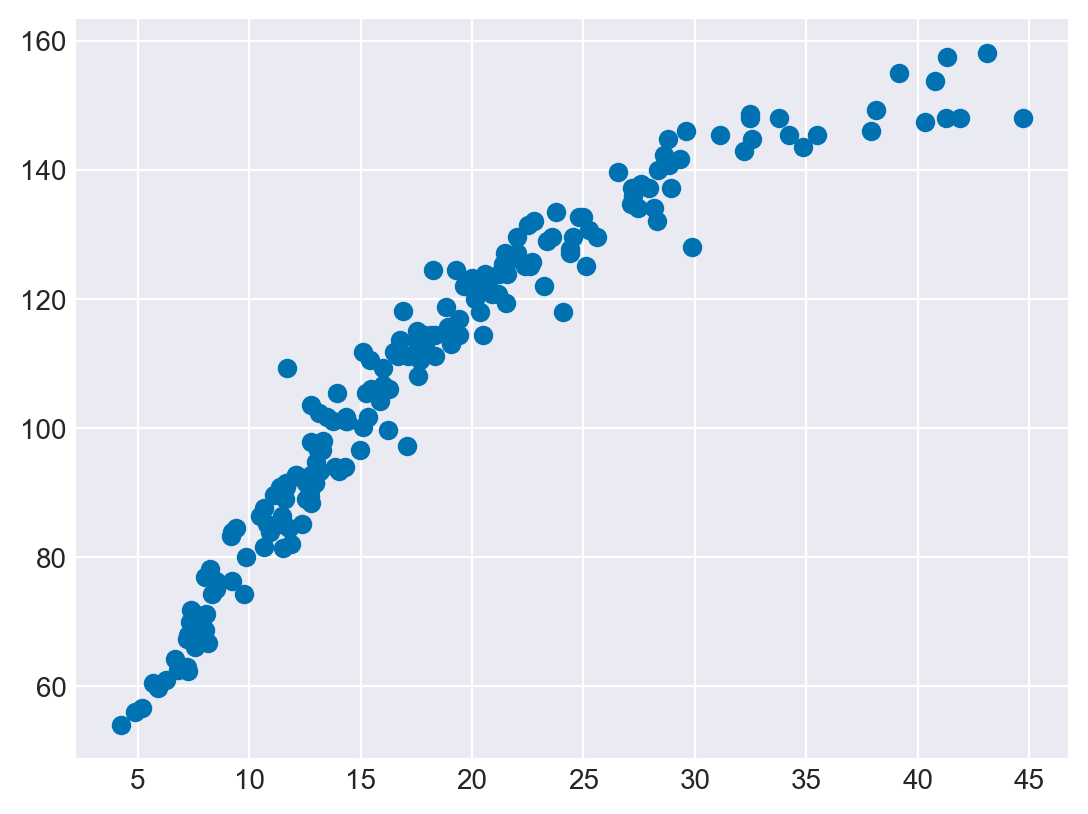

In [ ]:
# do some sanity checks on the data
plt.scatter(d3.weight, d3.height)

In [ ]:
# a)
with pm.Model() as model_4h2:    
    sigma = pm.Uniform('sigma', 0, 50)
    alpha = pm.Normal('alpha', mu=50, sigma=20)
    beta = pm.LogNormal('beta', mu=0, sigma=1)
    mu = pm.Deterministic('mu', alpha + beta * np.asarray(d3.weight-d3.weight.mean()))
    height = pm.Normal('height', mu=mu, sigma=sigma, observed=d3.height)
    trace_4h2 = pm.sample()


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, alpha, beta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 13 seconds.


In [ ]:
trace_4h2_samples = pm.sample_posterior_predictive(trace_4h2, model=model_4h2)

Sampling: [height]


<matplotlib.collections.PolyCollection>

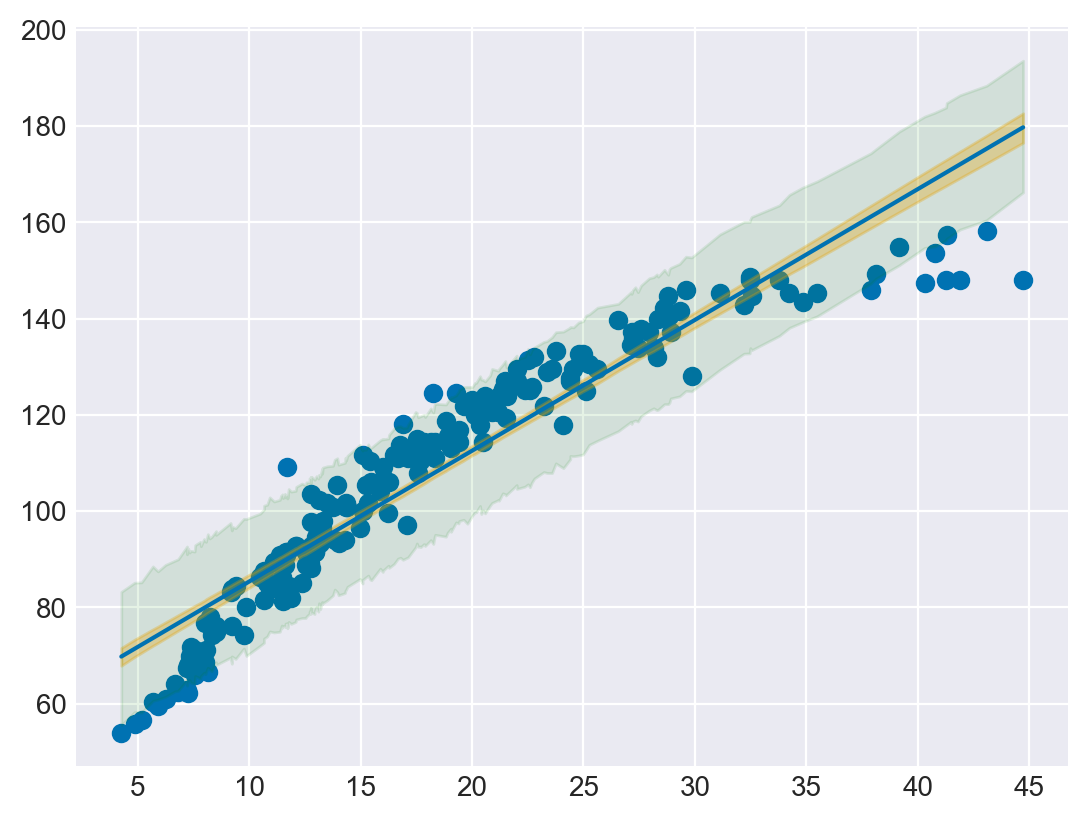

In [ ]:
plt.scatter(d3.weight, d3.height)
plt.plot(d3.weight, trace_4h2.posterior.mu.mean(dim=['chain', 'draw']))
mu_hdi = az.hdi(trace_4h2.posterior.mu, 0.89).mu
plt.fill_between(d3.weight, mu_hdi[:,0], mu_hdi[:,1], color='orange', alpha=0.3)

height_hdi = az.hdi(trace_4h2_samples.posterior_predictive.height, 0.89).height
plt.fill_between(d3.weight, height_hdi[:,0], height_hdi[:,1], color='green', alpha=0.1)



# c

# er, data seems to be curved but our model is linear...so thats a problem...


In [ ]:
#4H3
with pm.Model() as model_4h3:    
    sigma = pm.Uniform('sigma', 0, 50)
    alpha = pm.Normal('alpha', mu=178, sigma=20)
    beta = pm.LogNormal('beta', mu=0, sigma=1)
    mu = pm.Deterministic('mu', alpha + beta * np.asarray(np.log(d3.weight)))
    height = pm.Normal('height', mu=mu, sigma=sigma, observed=d3.height)
    trace_4h3 = pm.sample()


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, alpha, beta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 13 seconds.
The acceptance probability does not match the target. It is 0.8786, but should be close to 0.8. Try to increase the number of tuning steps.


In [ ]:
trace_4h3_samples = pm.sample_posterior_predictive(trace_4h3, model=model_4h3)

Sampling: [height]


<matplotlib.collections.PolyCollection>

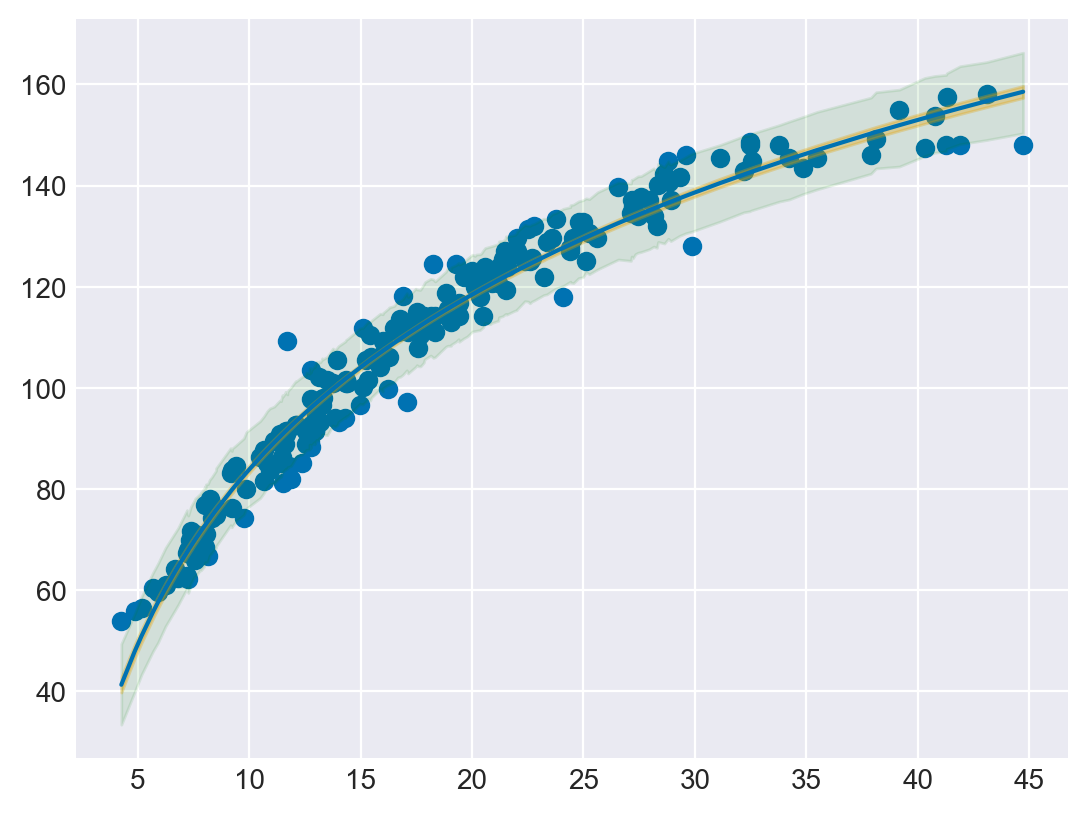

In [ ]:
plt.scatter(d3.weight, d3.height)
plt.plot(d3.weight, trace_4h3.posterior.mu.mean(dim=['chain', 'draw']))
mu_hdi = az.hdi(trace_4h3.posterior.mu, 0.89).mu
plt.fill_between(d3.weight, mu_hdi[:,0], mu_hdi[:,1], color='orange', alpha=0.3)

height_hdi = az.hdi(trace_4h3_samples.posterior_predictive.height, 0.89).height
plt.fill_between(d3.weight, height_hdi[:,0], height_hdi[:,1], color='green', alpha=0.1)


In [ ]:
np.log(d3.weight)

177    1.447489
156    1.578518
178    1.640861
102    1.735171
86     1.774392
         ...   
79     3.720302
155    3.720989
19     3.735299
67     3.763320
57     3.800768
Name: weight, Length: 192, dtype: float64